
SLEEP MEDICINE LLM BENCHMARKING STUDY
Enhanced Analysis Pipeline - NPJ Digital Medicine Publication Quality
✓ Data loaded successfully
  - Cases: 129
  - Models: GPT, Deepseek, Claude, Gemini, Grok
✓ Output directory created: ./figures/

GENERATING TABLES

TABLE 1: DEMOGRAPHIC CHARACTERISTICS OF CLINICAL CASES

Characteristic                                               Value
-------------------------------------------------------------------
Total cases, n                                                 129

Age, years                              
  Mean ± SD                                   41.7 ± 22.4
  Median (IQR)                                39.0 (25.0–59.0)
  Range                                        0.6–90.0

Age group, n (%)                        
  Pediatric (<18 years)                      21 ( 16.3%)
  Adult (18–64 years)                        88 ( 68.2%)
  Elderly (≥65 years)                        20 ( 15.5%)

Gender, n (%)                           
  Male    

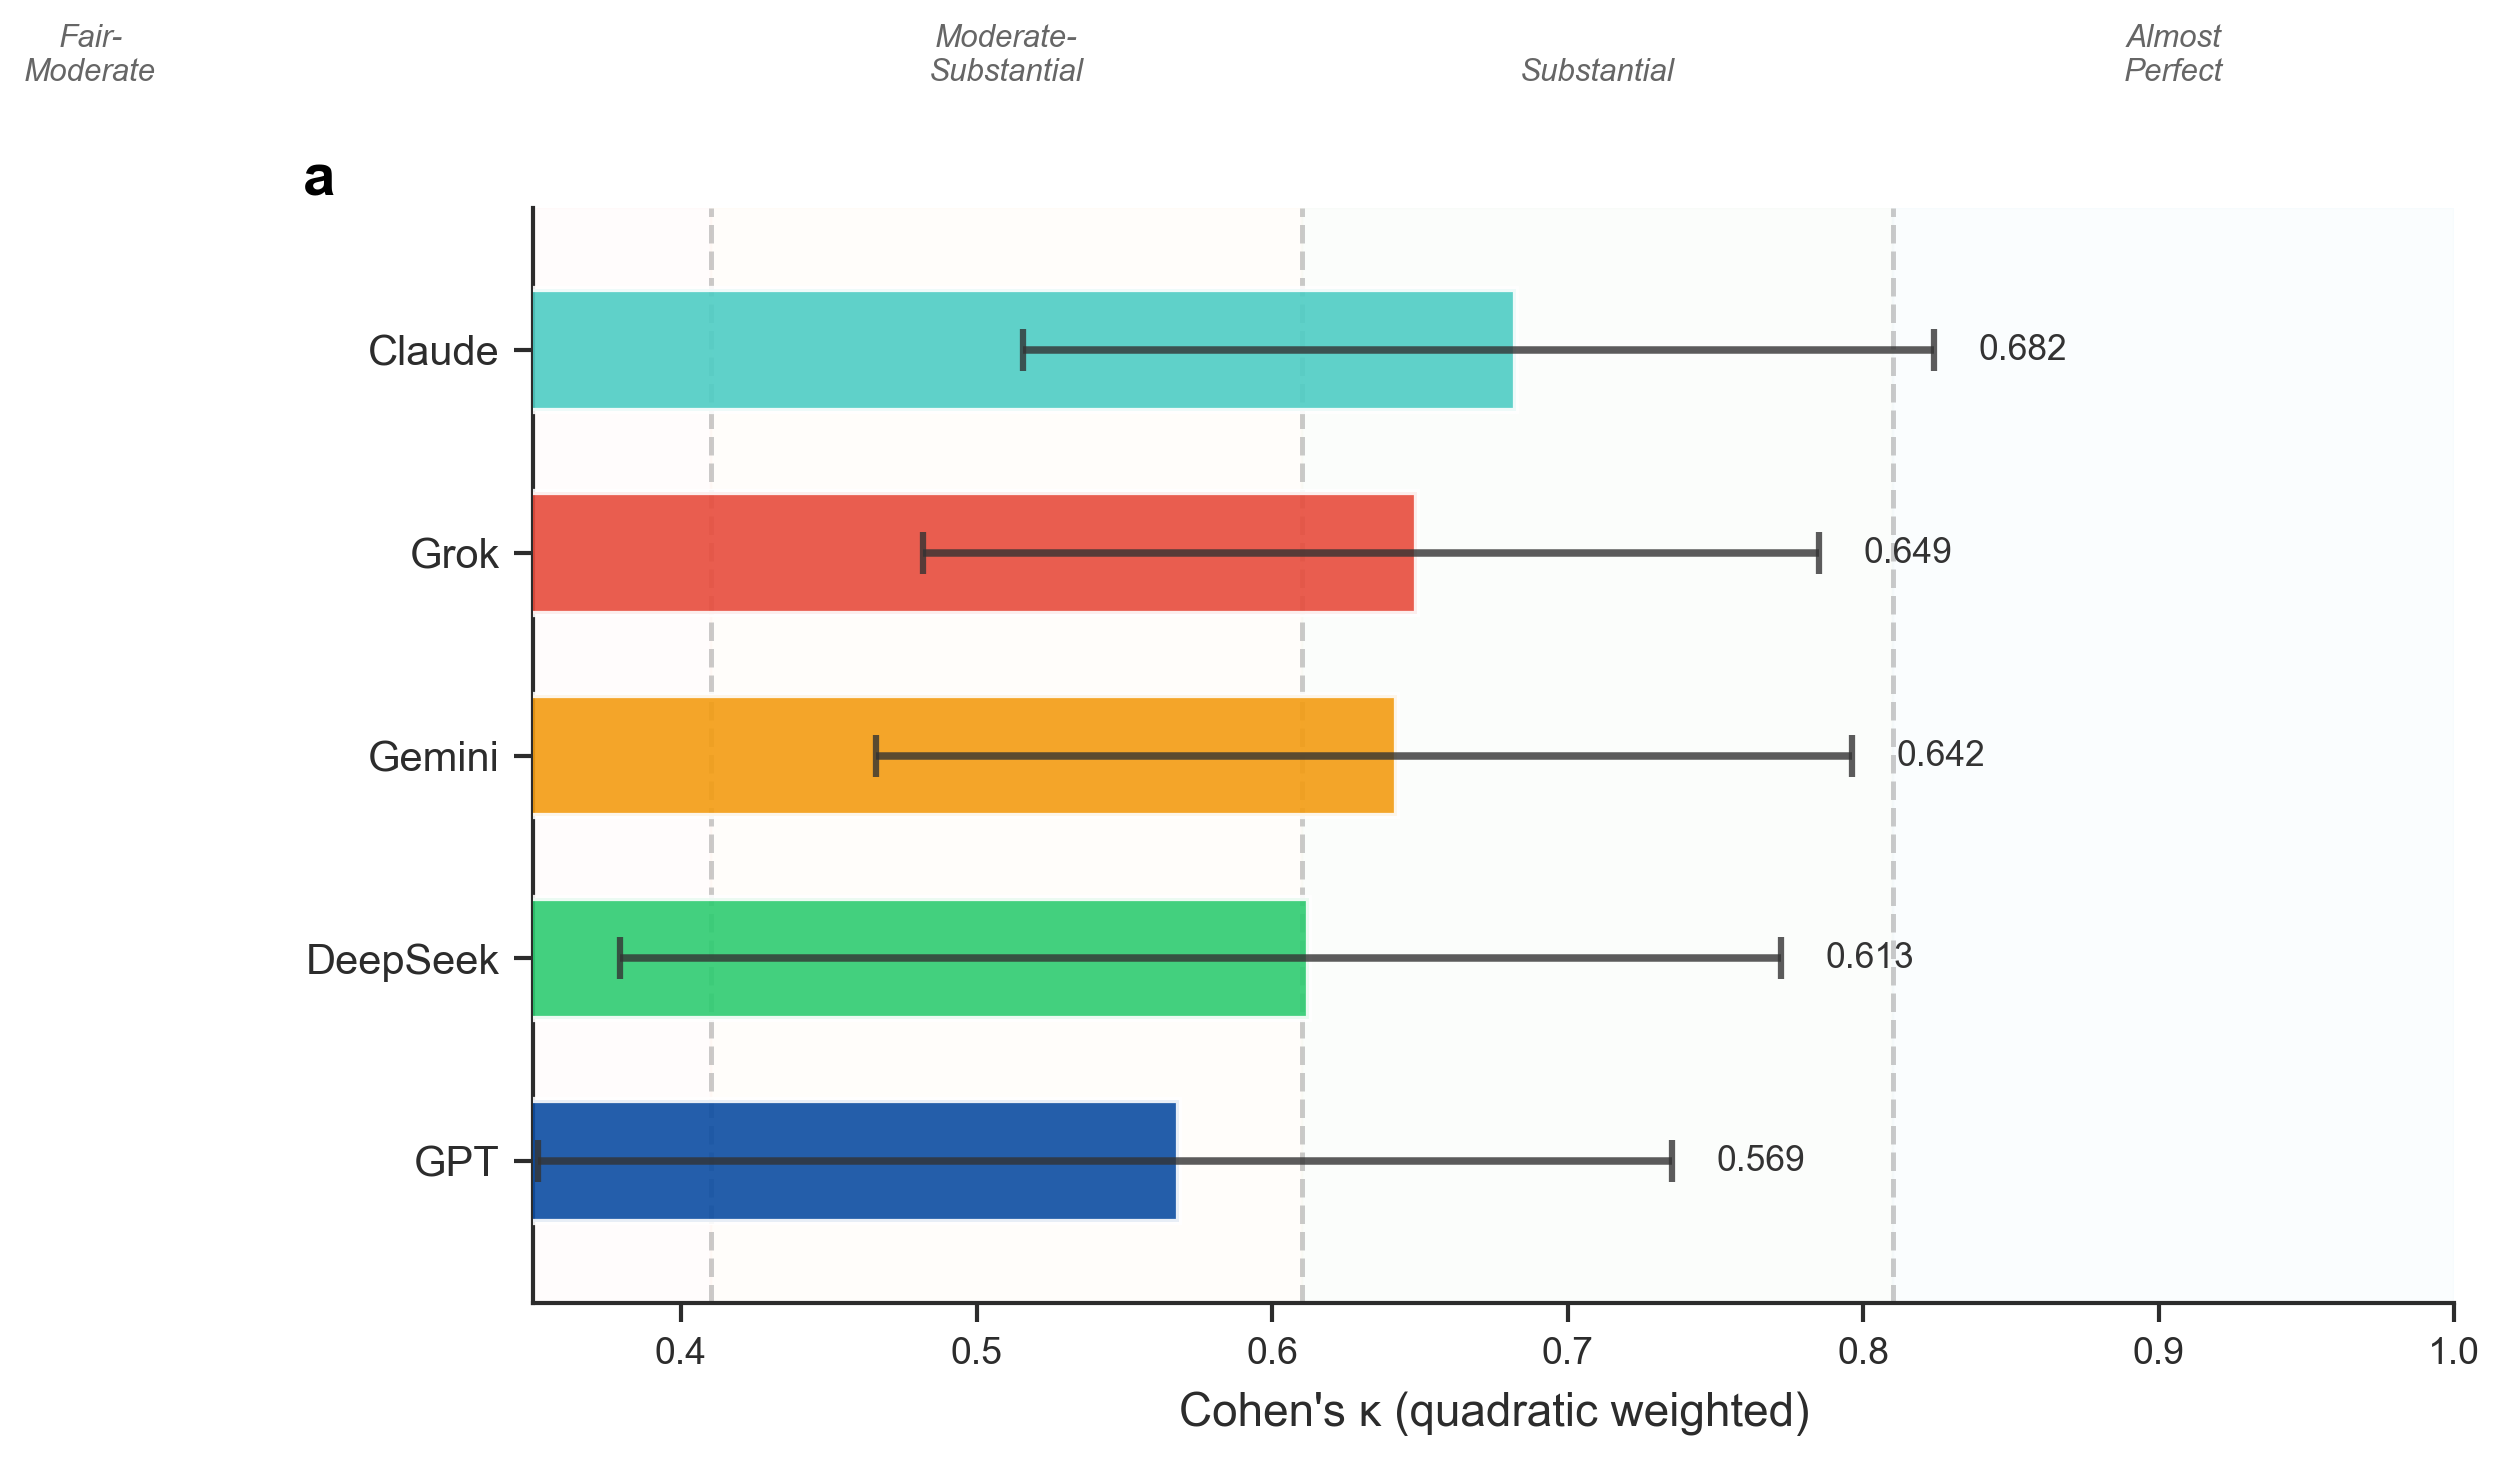

✓ Figure 1 saved to figures/

Generating Figure 2: Cumulative Top-K Accuracy (Enhanced)...


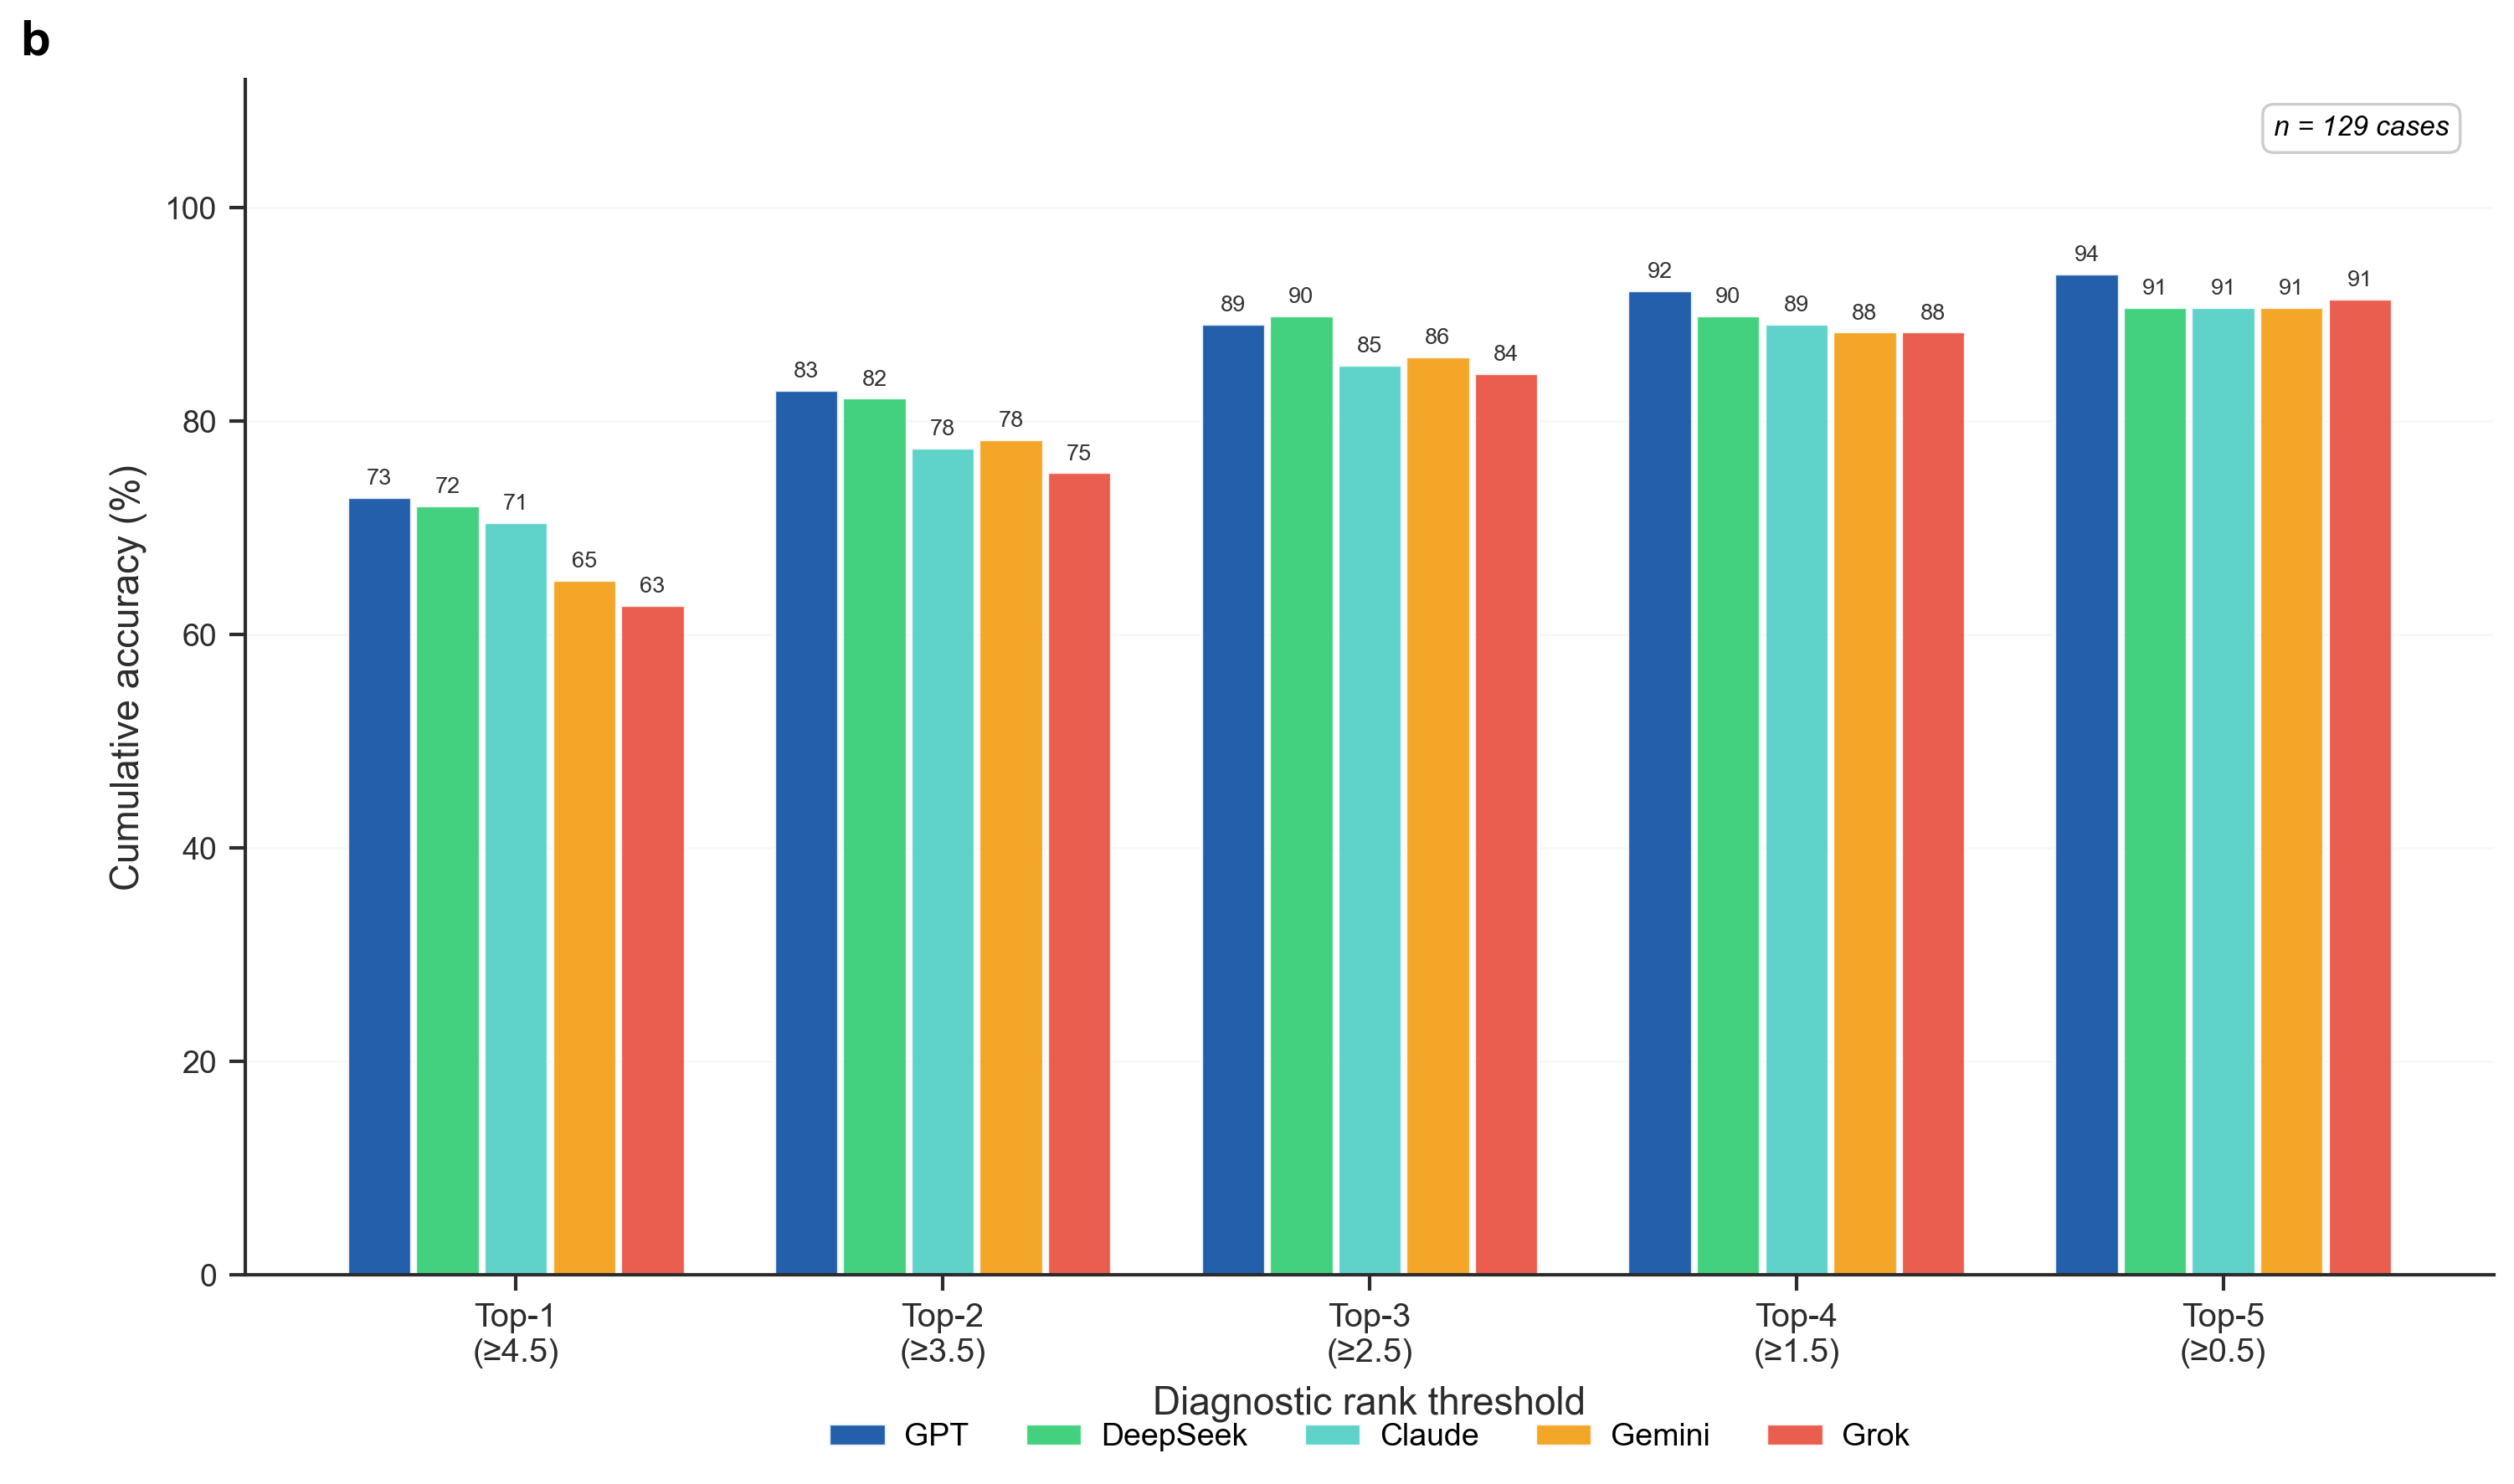

✓ Figure 2 saved to figures/

Generating Figure 3: Performance by Clinical Domain (Enhanced)...


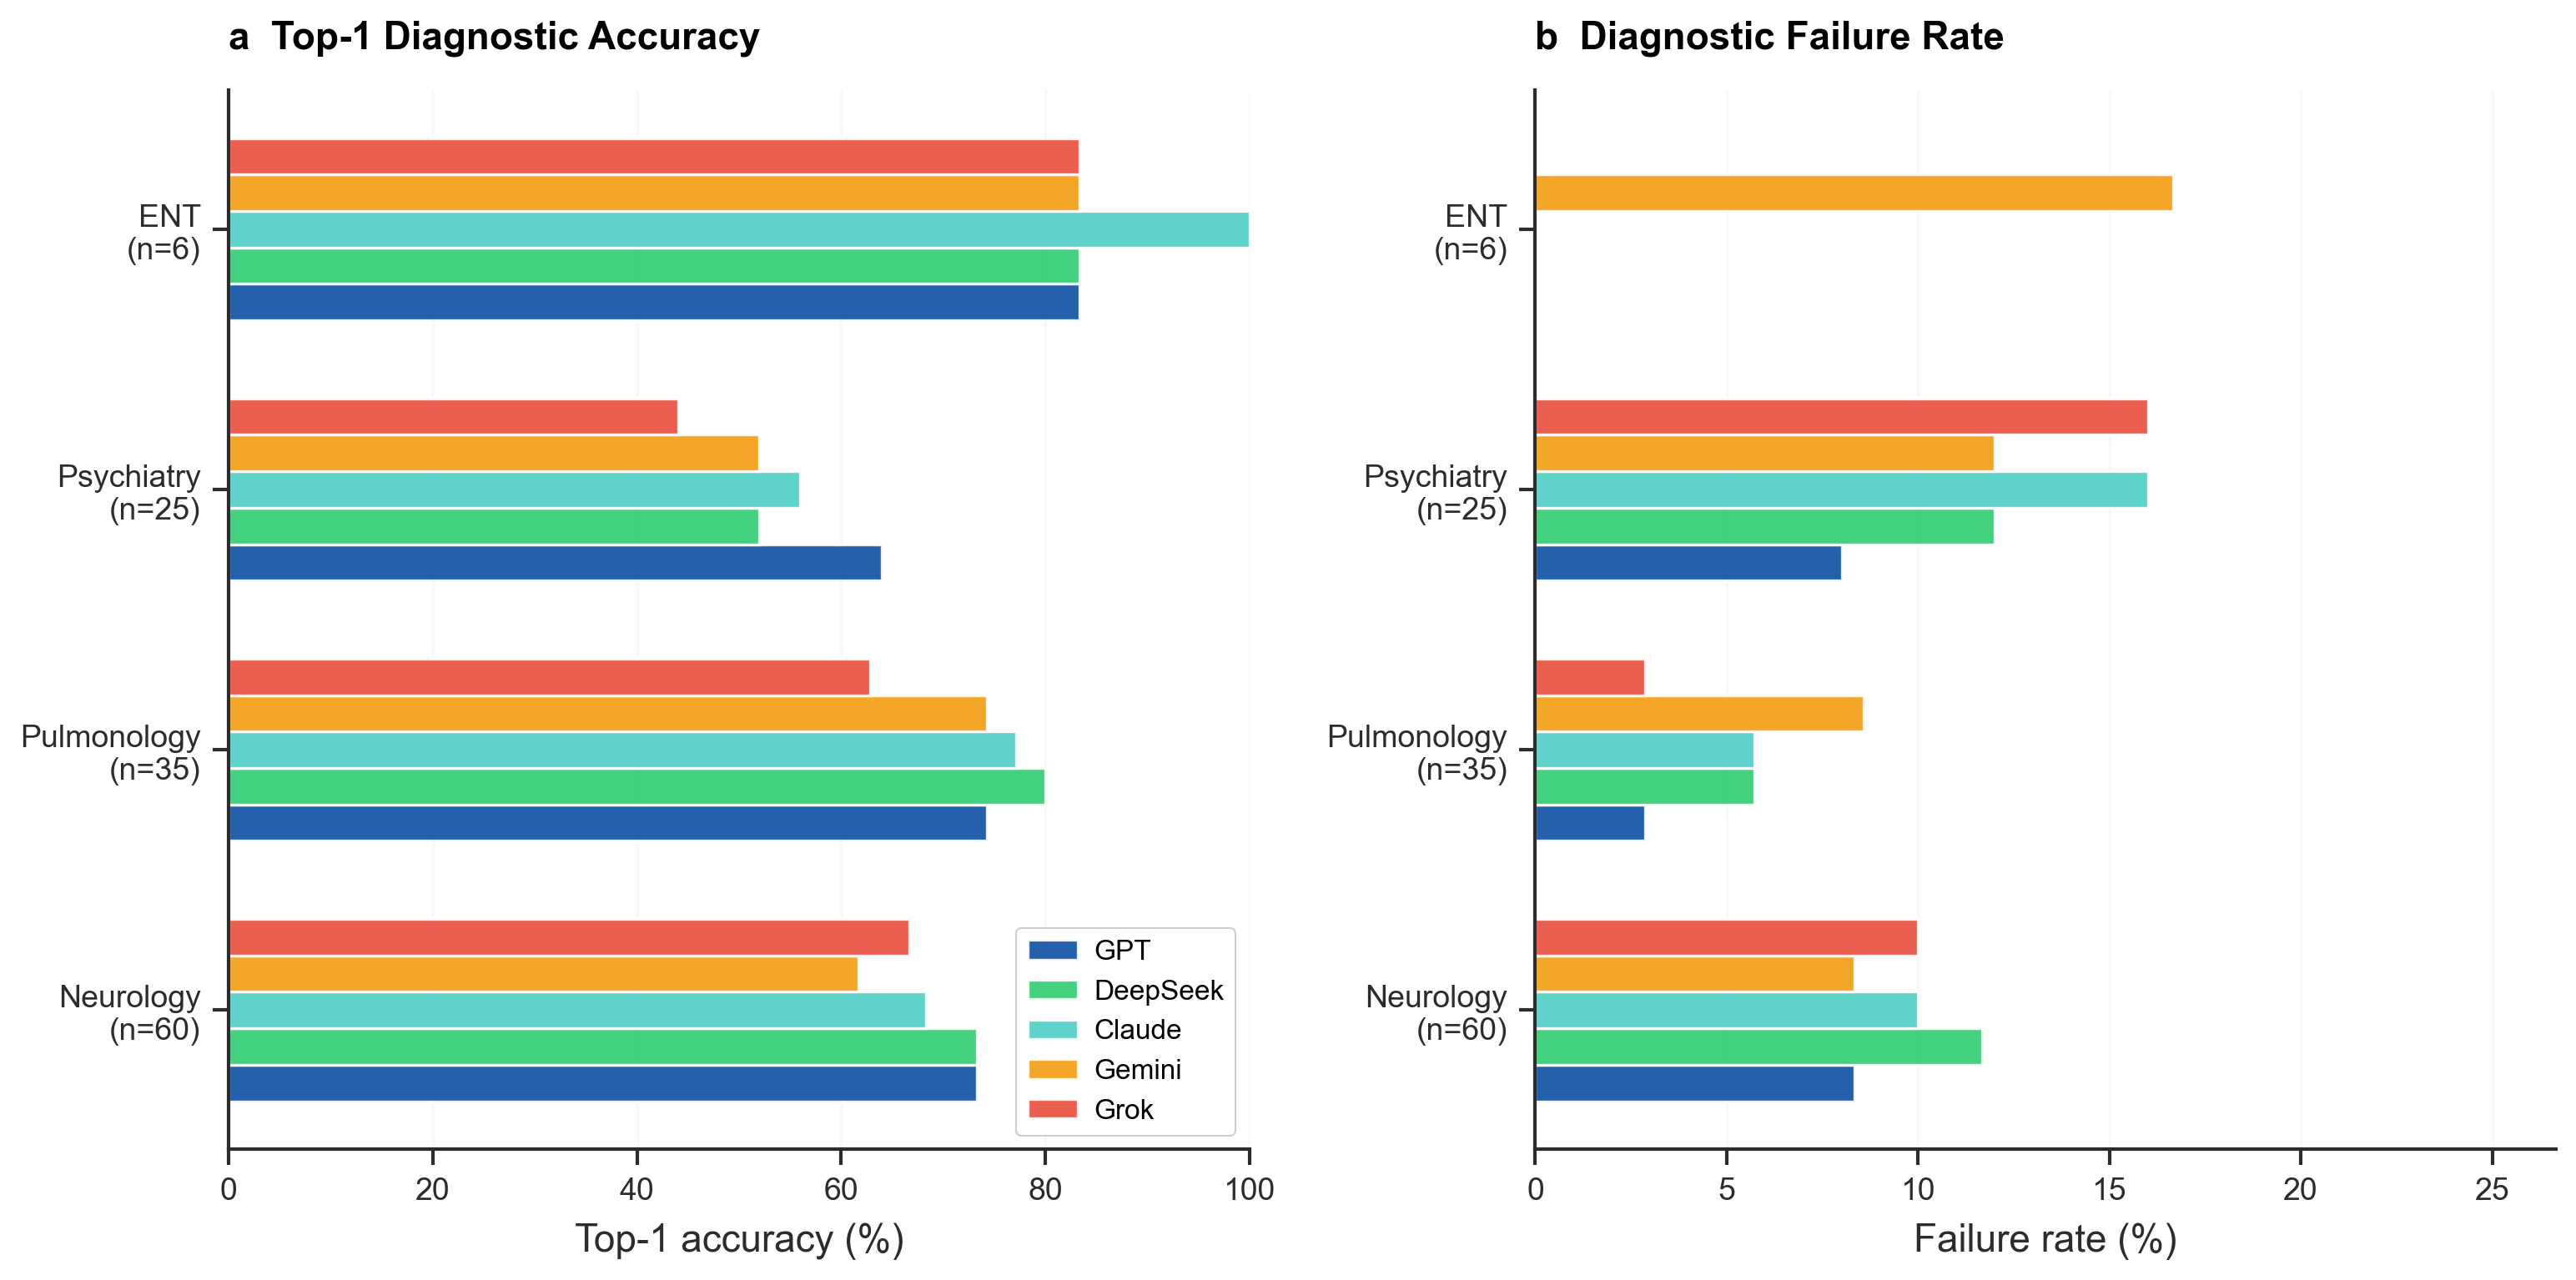

✓ Figure 3 saved to figures/

Generating Figure 4: Performance by Source Accessibility (Enhanced)...


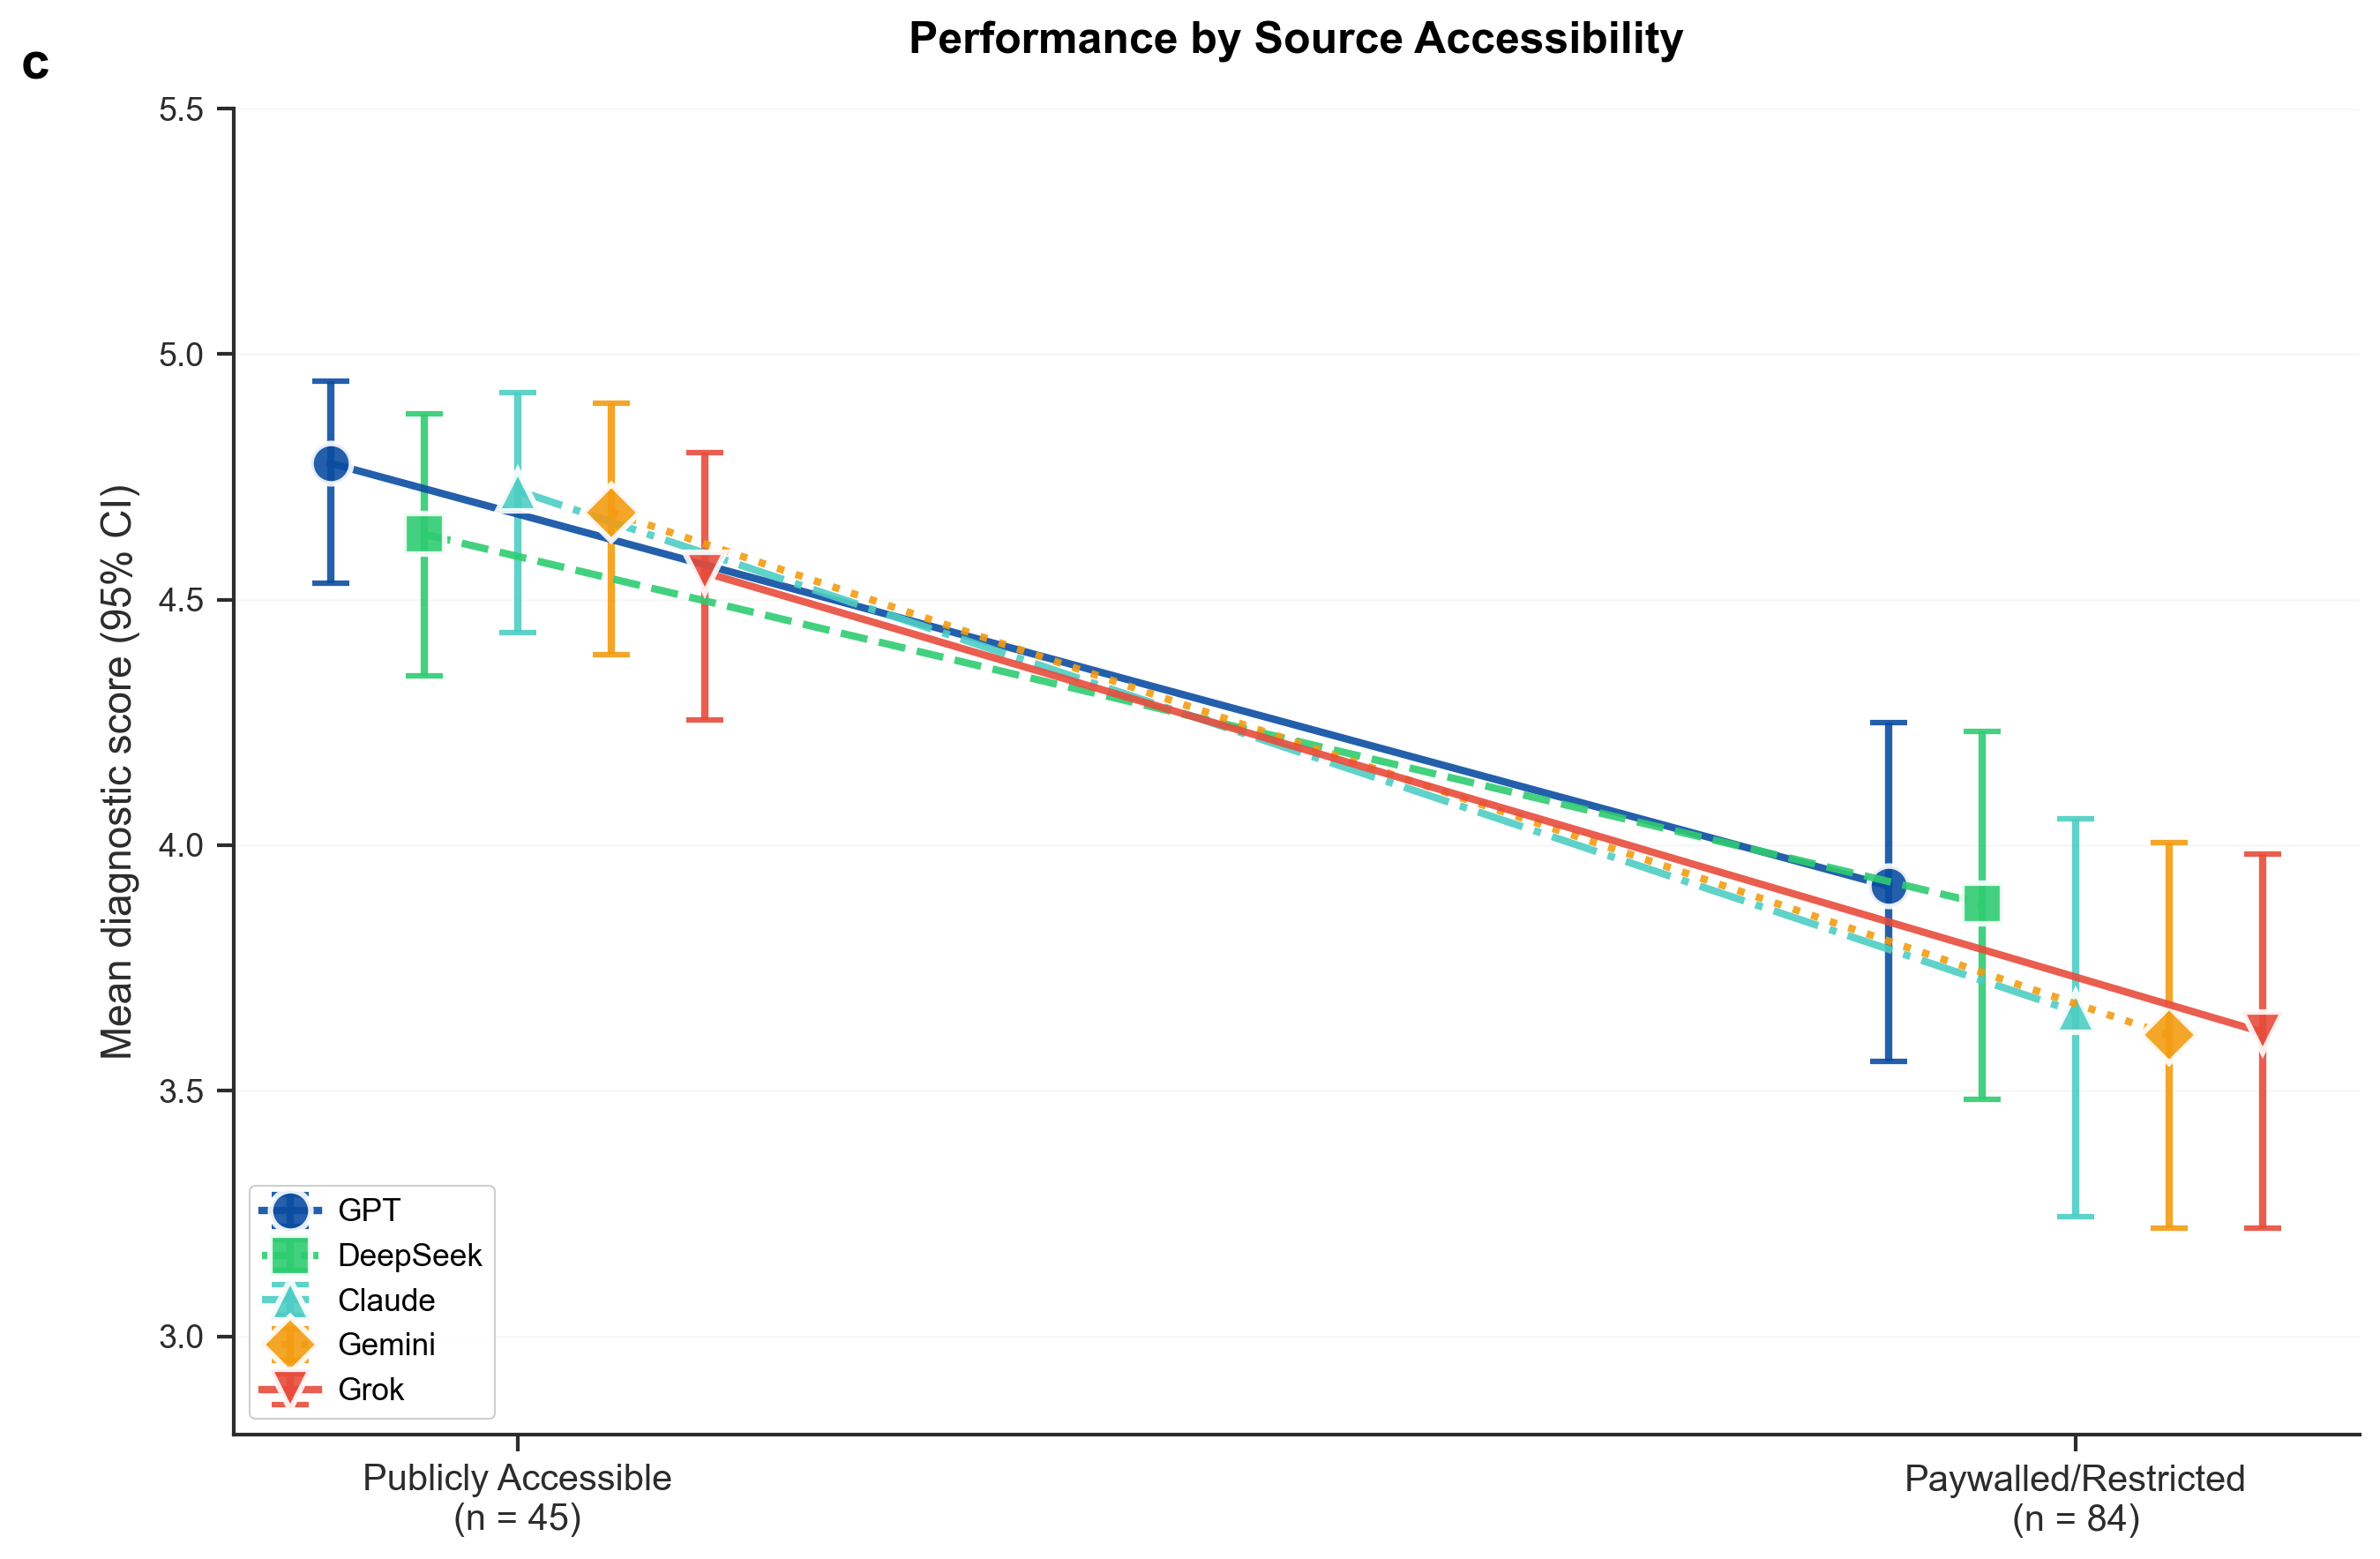

✓ Figure 4 saved to figures/

Generating Figure 5: Performance Distribution (Enhanced)...


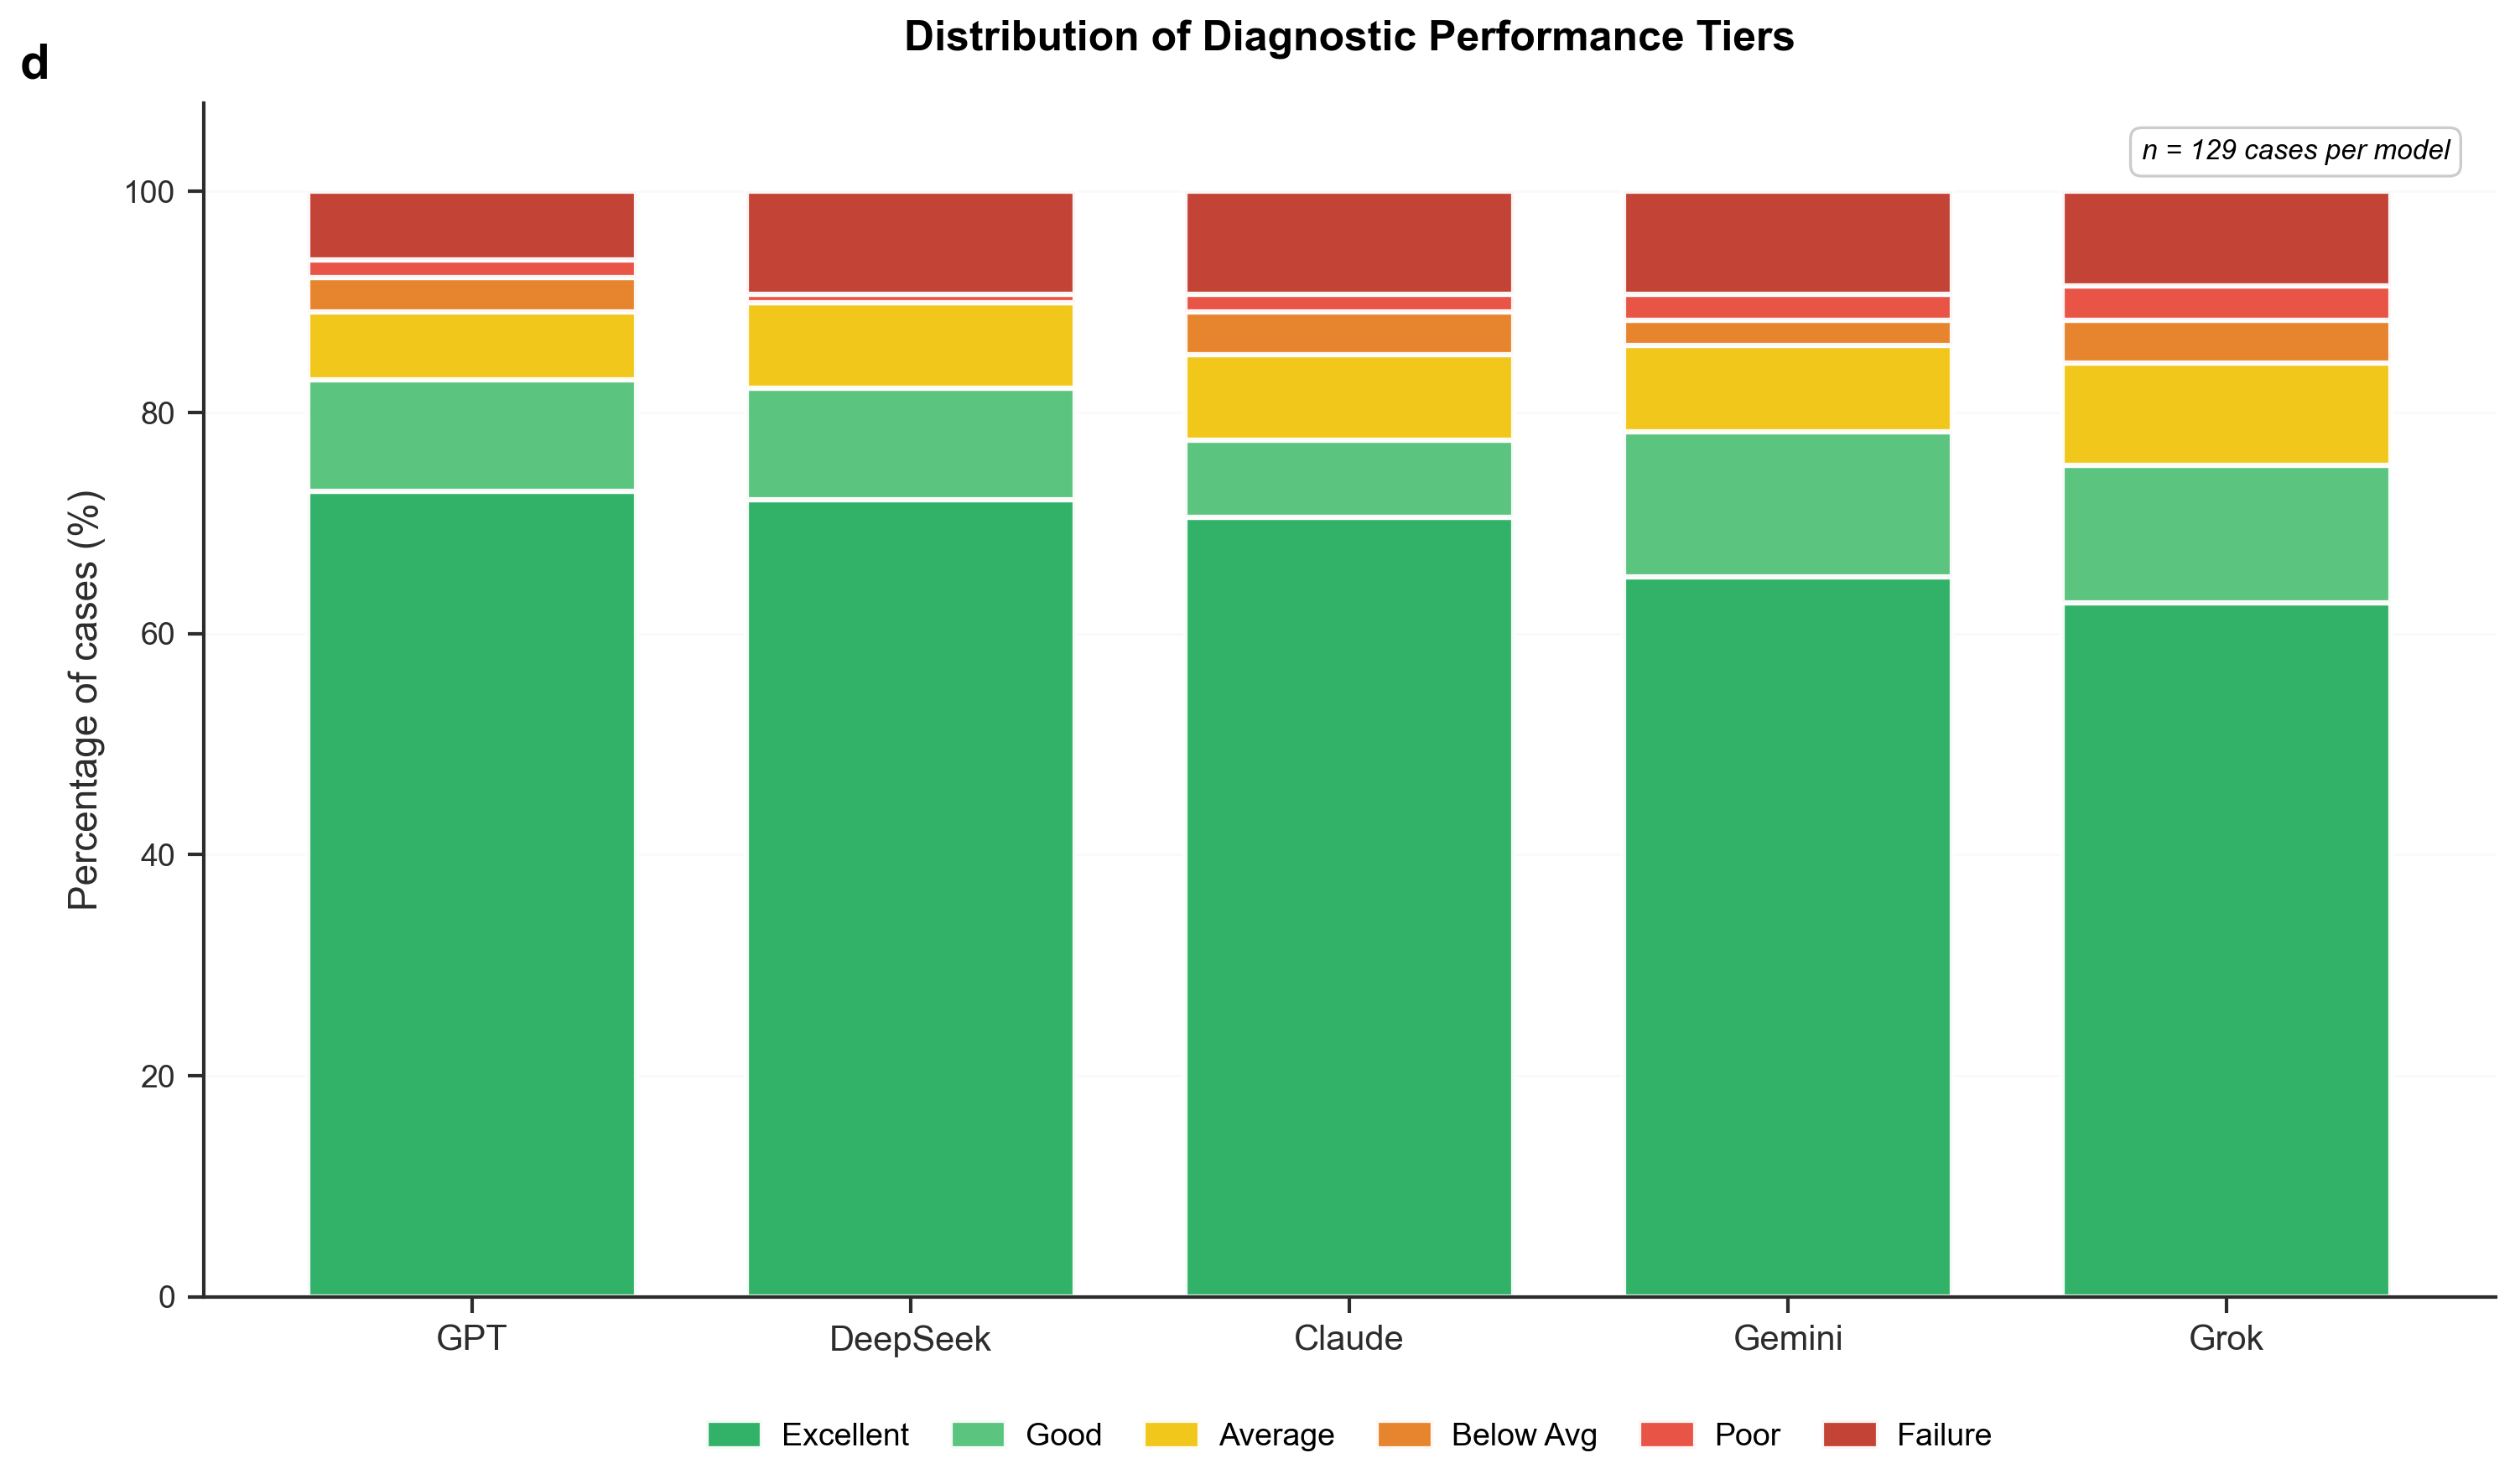

✓ Figure 5 saved to figures/

Generating Figure 6: Model Consensus Analysis (Enhanced)...


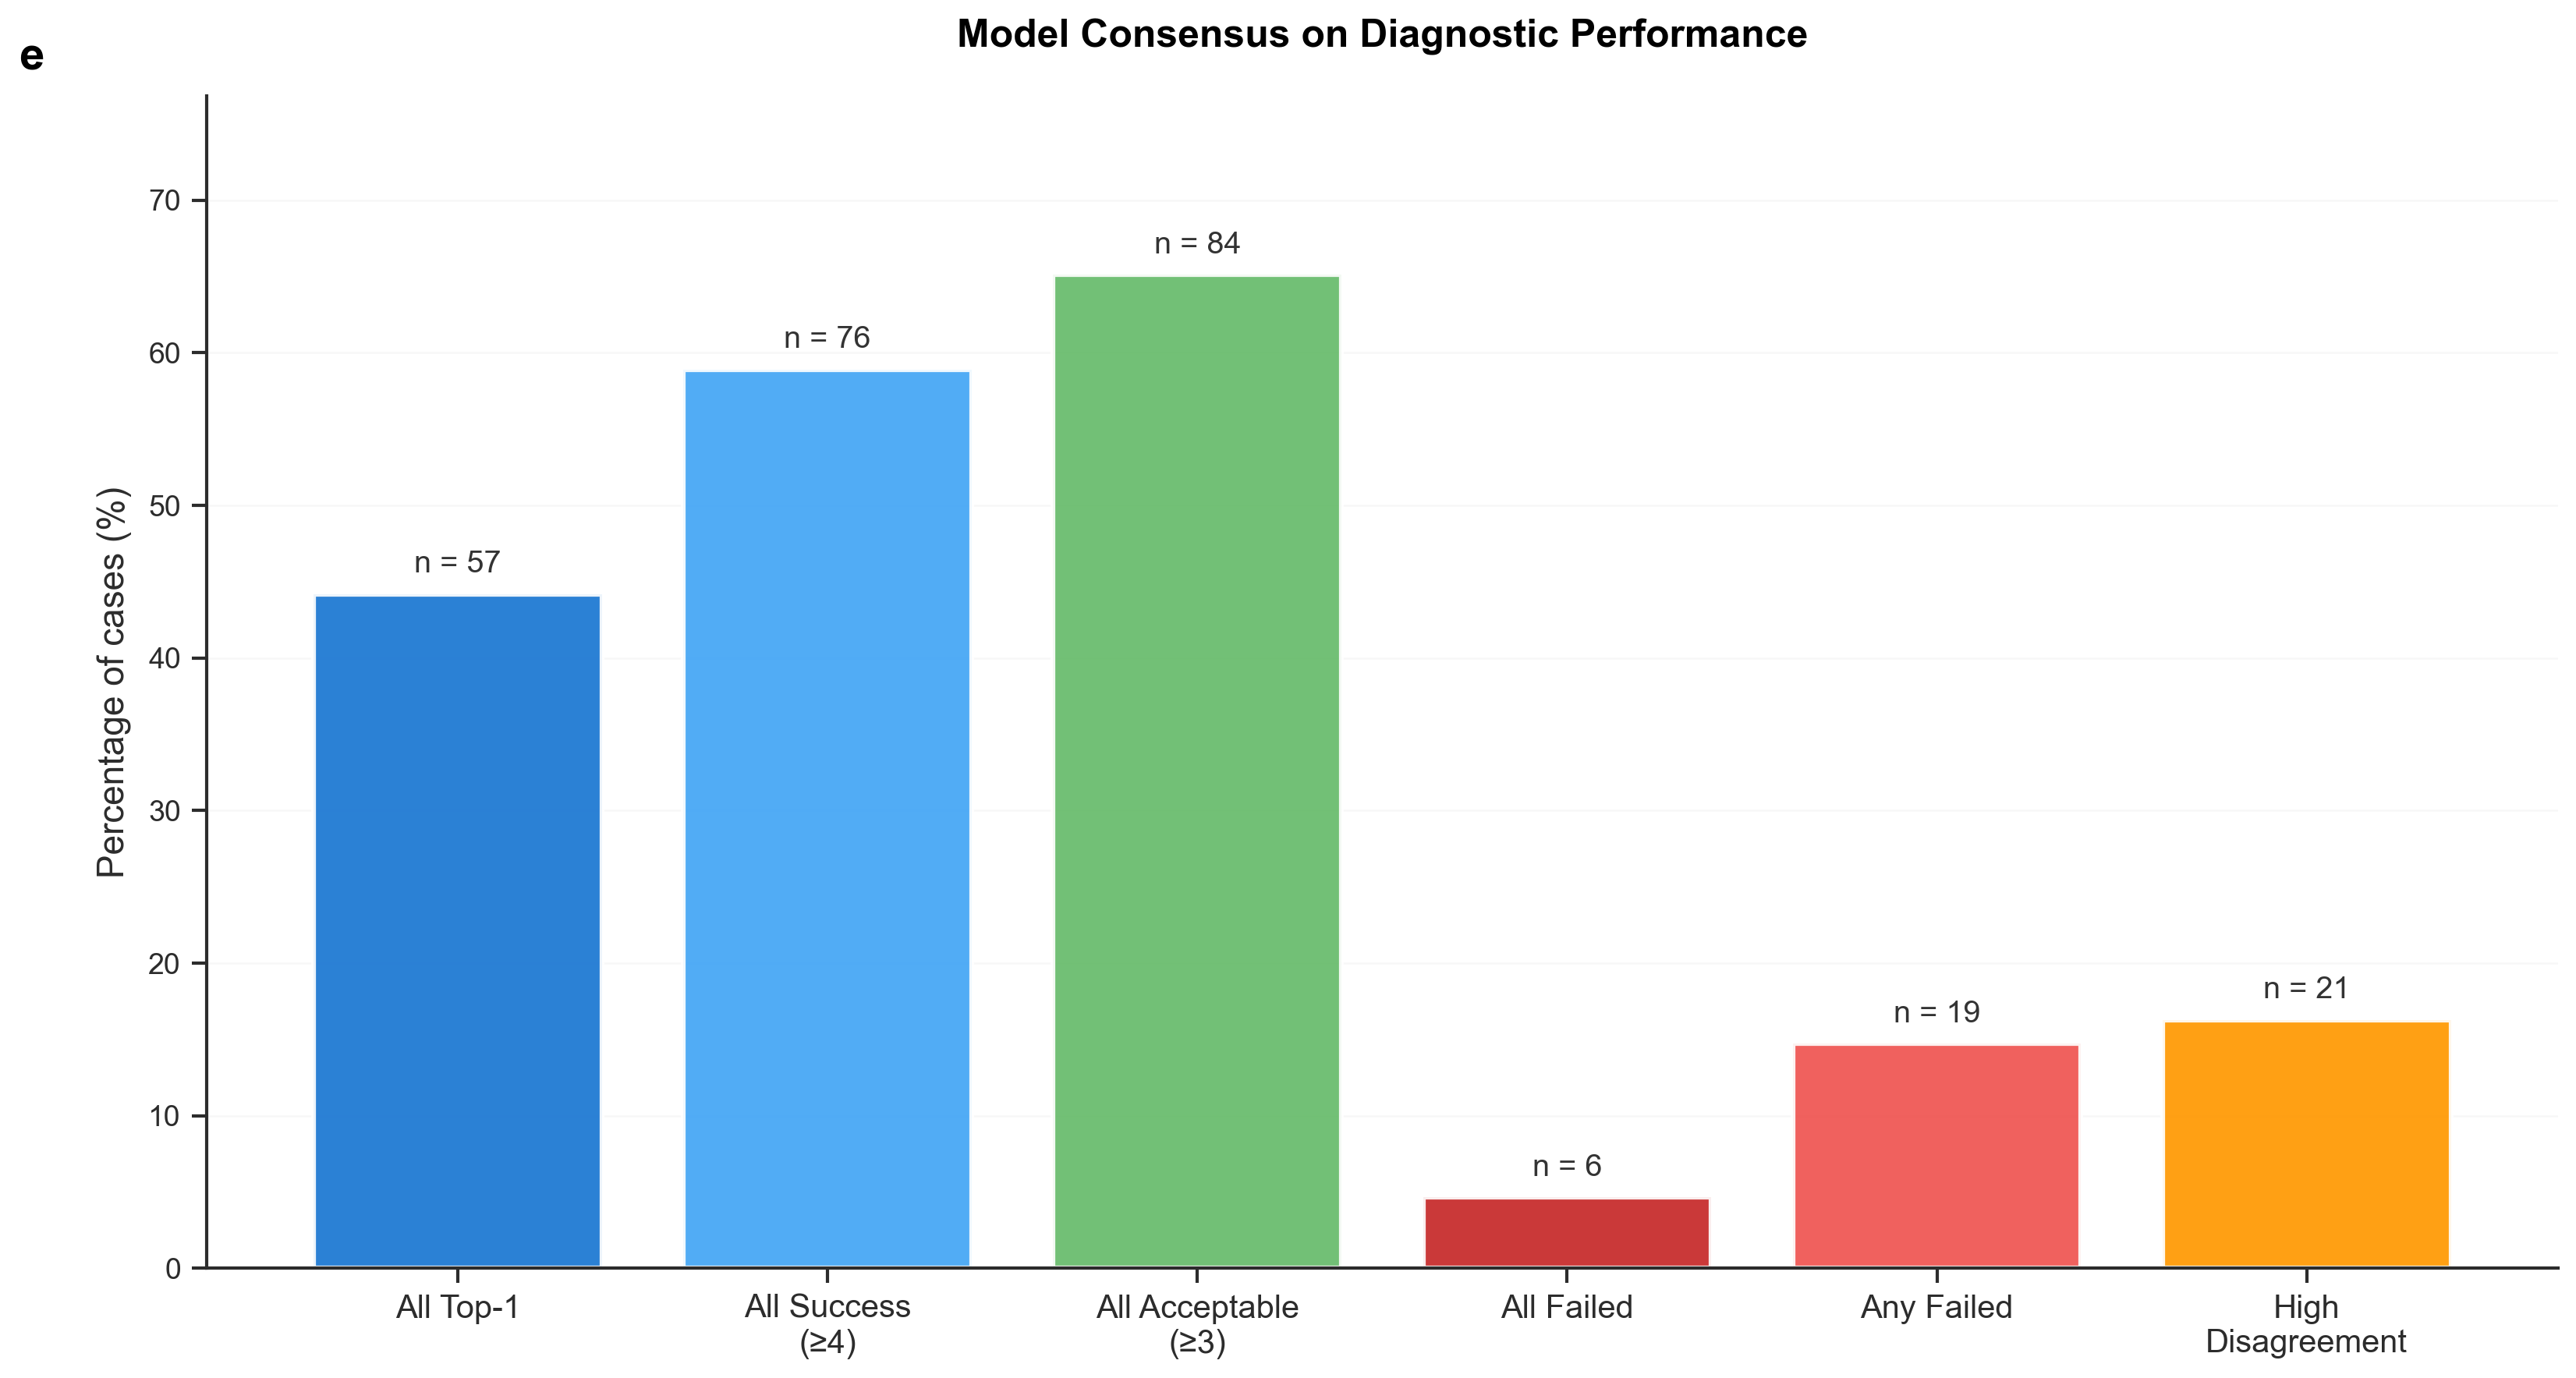

✓ Figure 6 saved to figures/

Generating Figure 7: Unique Performance Patterns (Enhanced)...


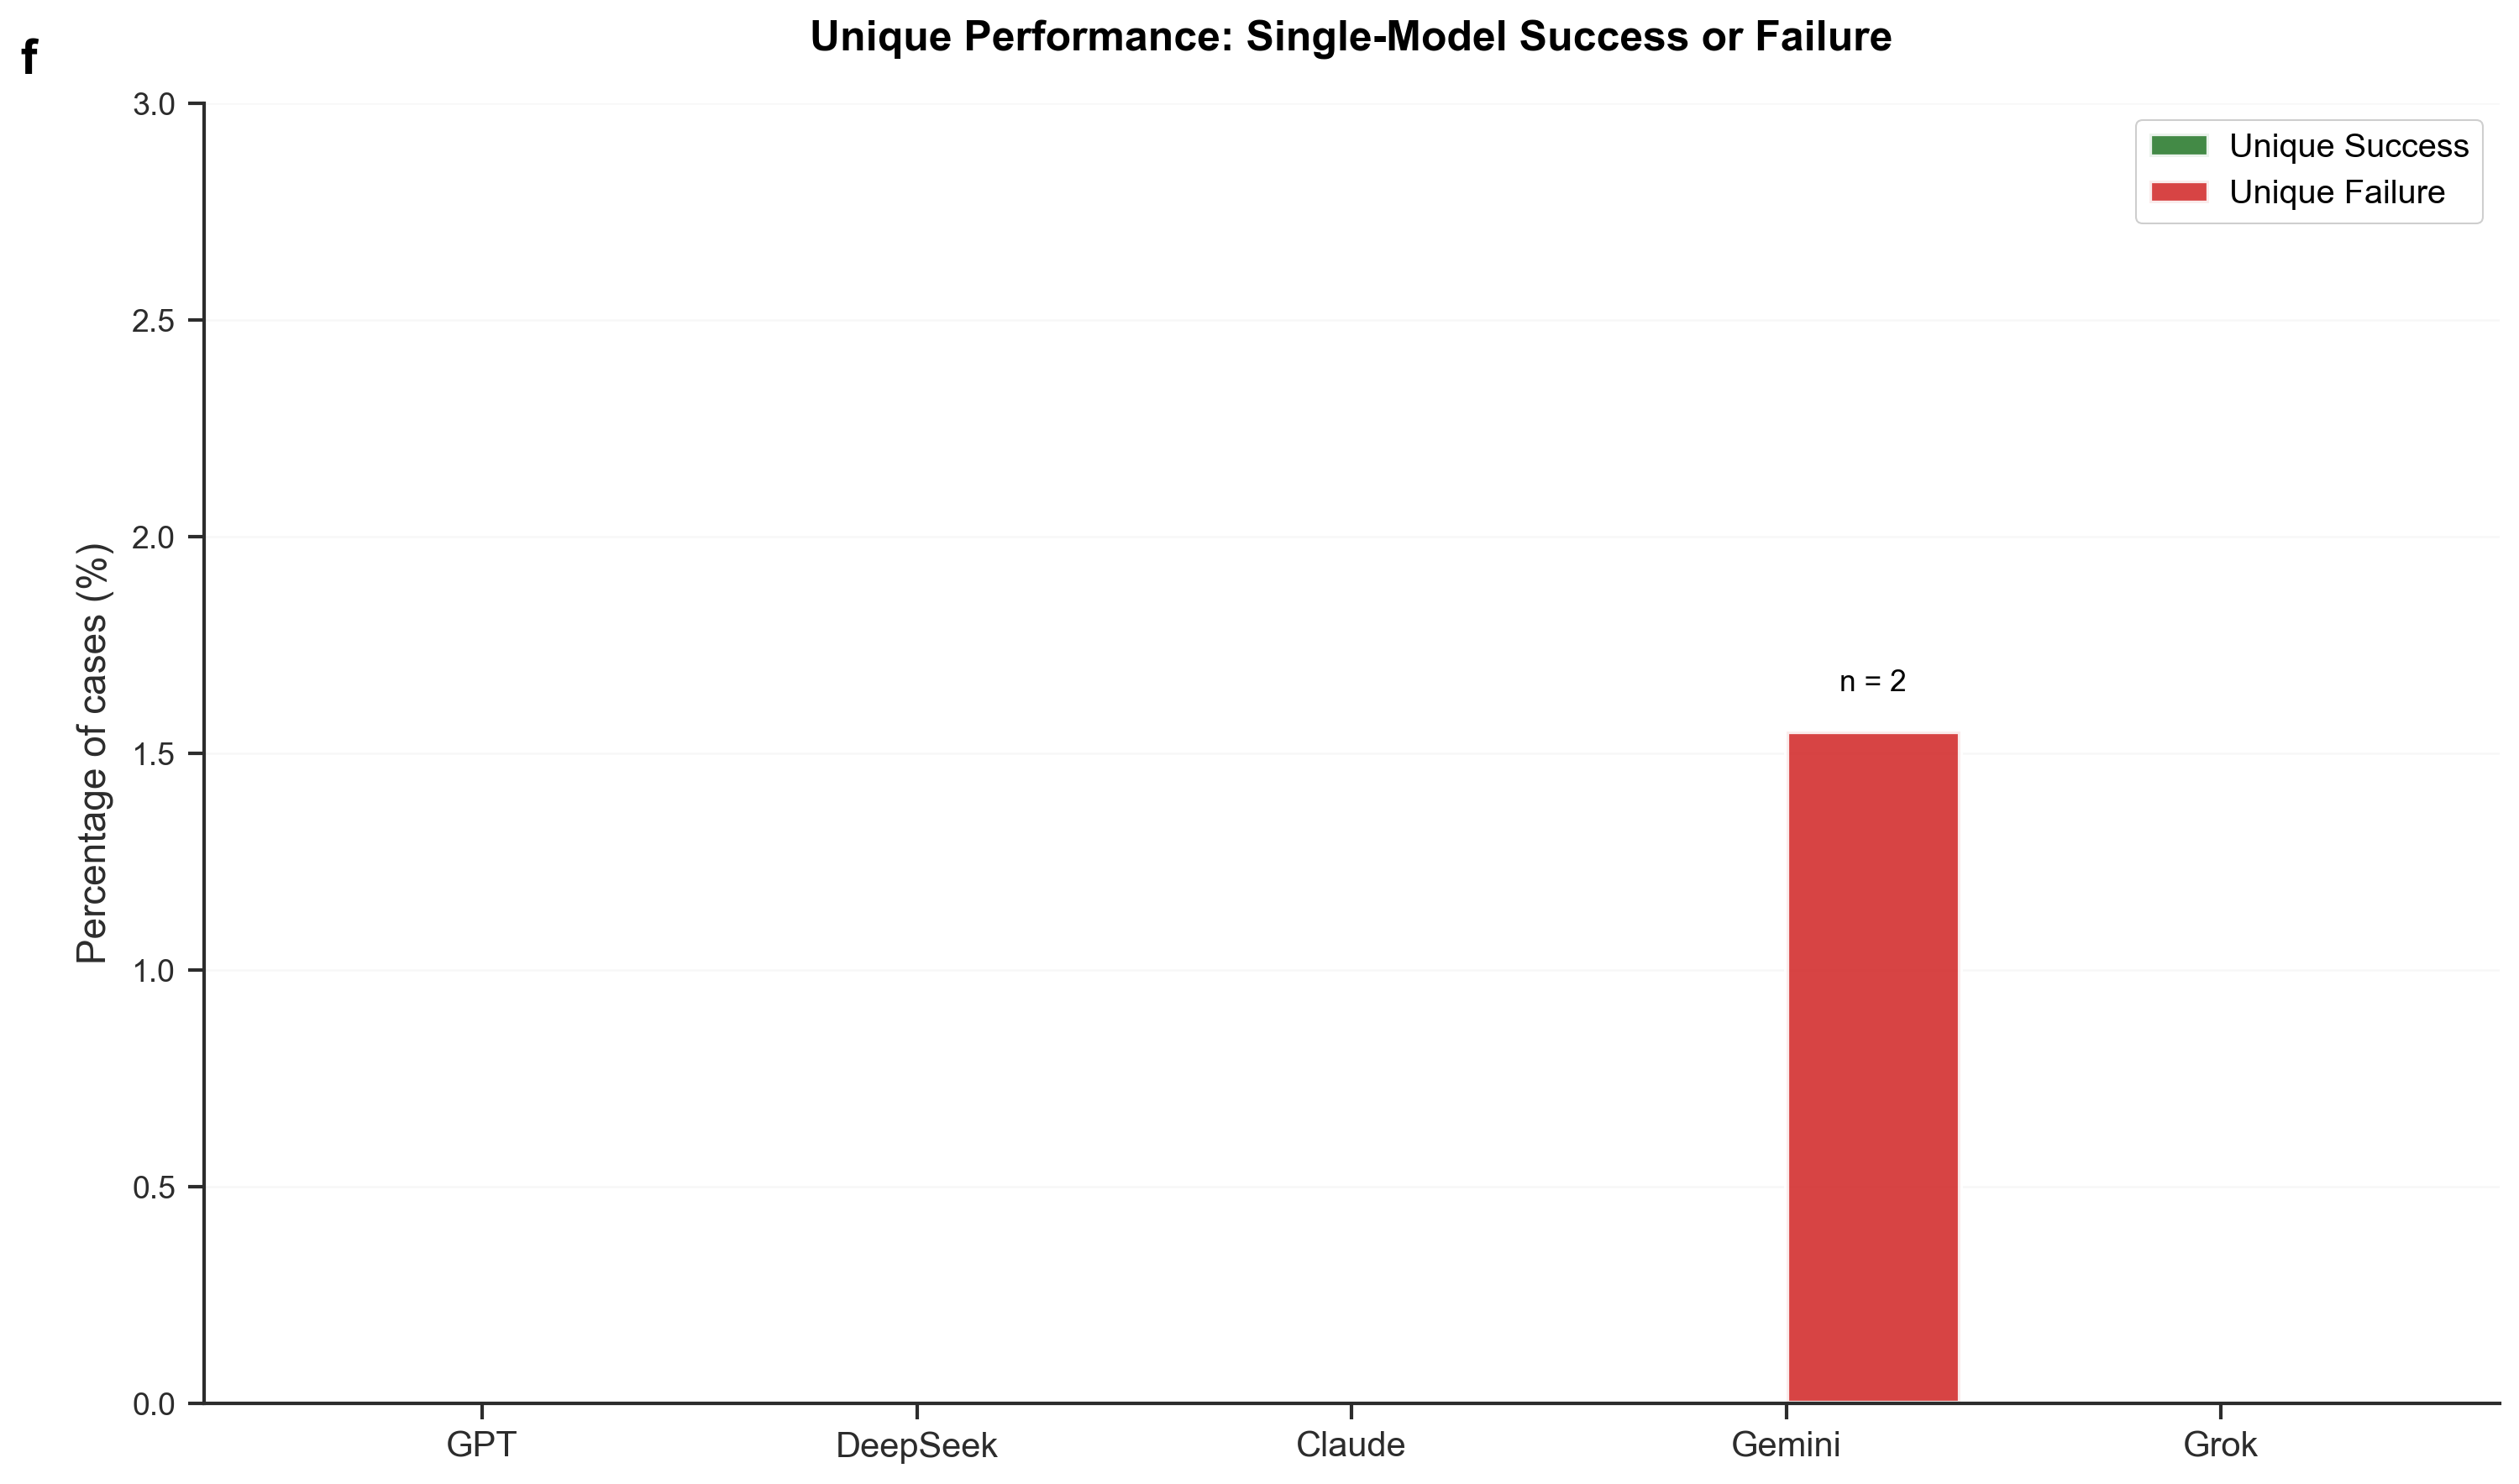

✓ Figure 7 saved to figures/

Generating Figure 8: Performance Heatmap (NEW)...


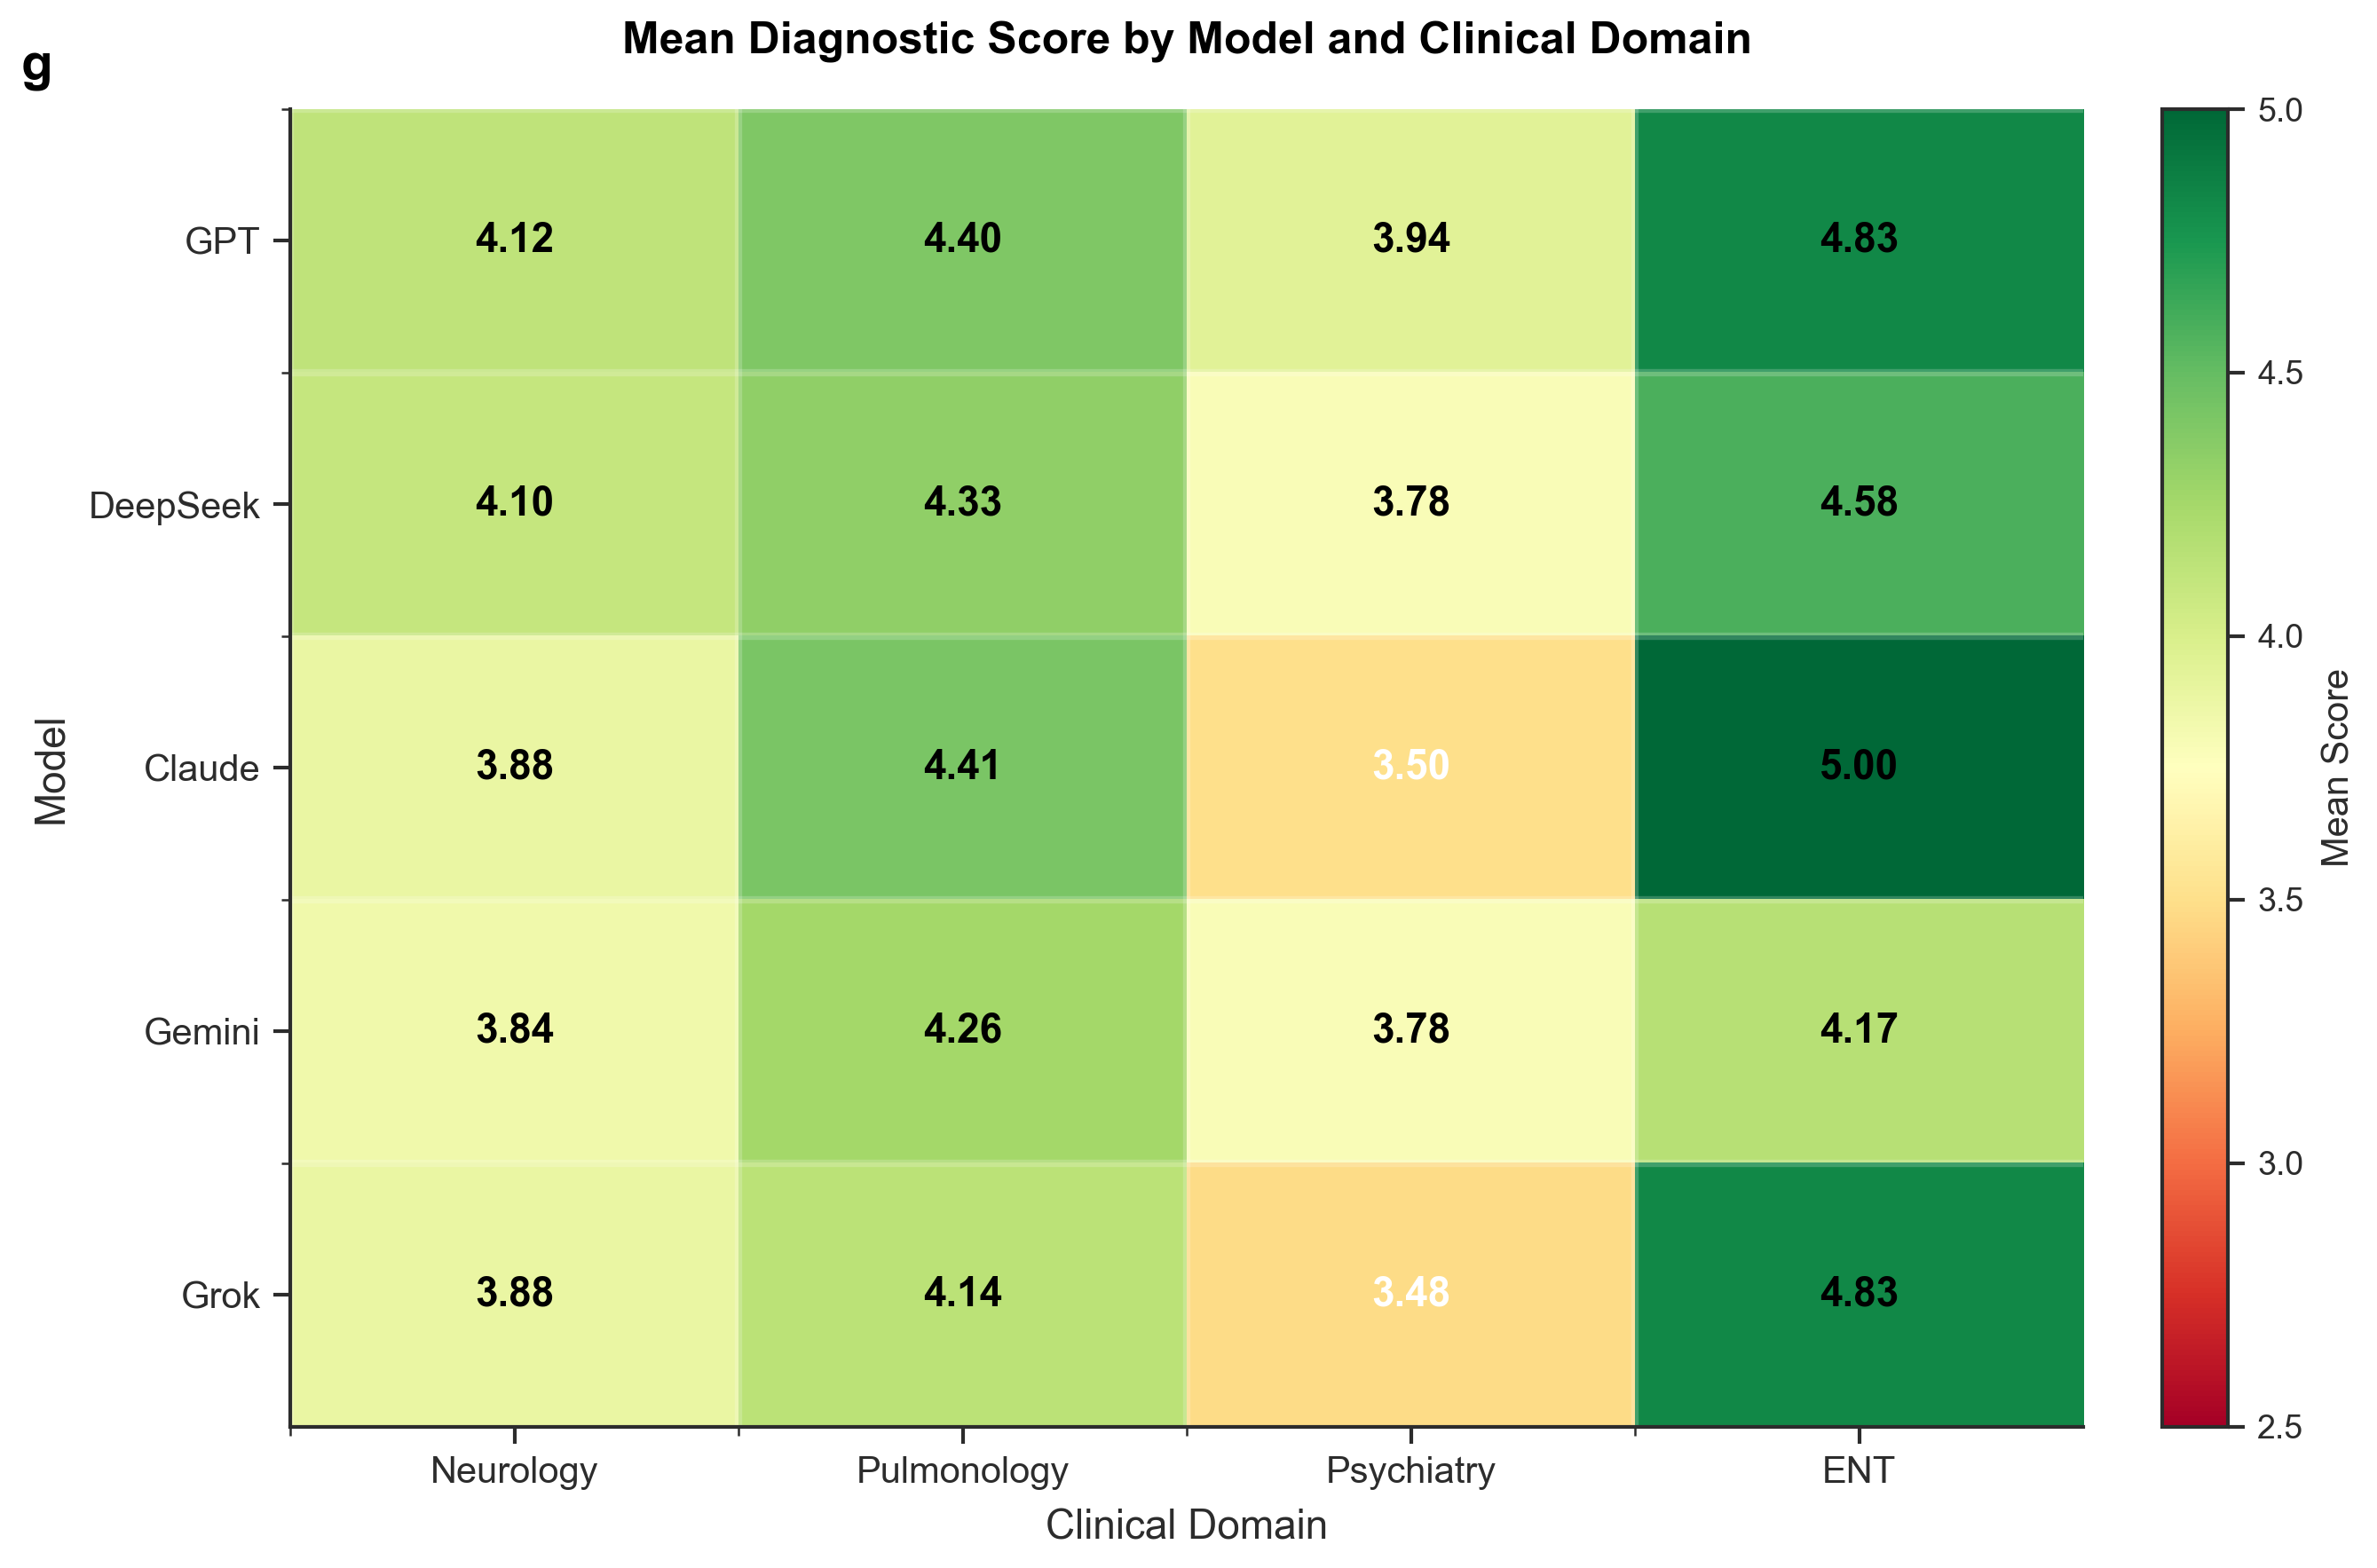

✓ Figure 8 saved to figures/

Generating Figure 9: Score Distribution Violin Plots (NEW)...


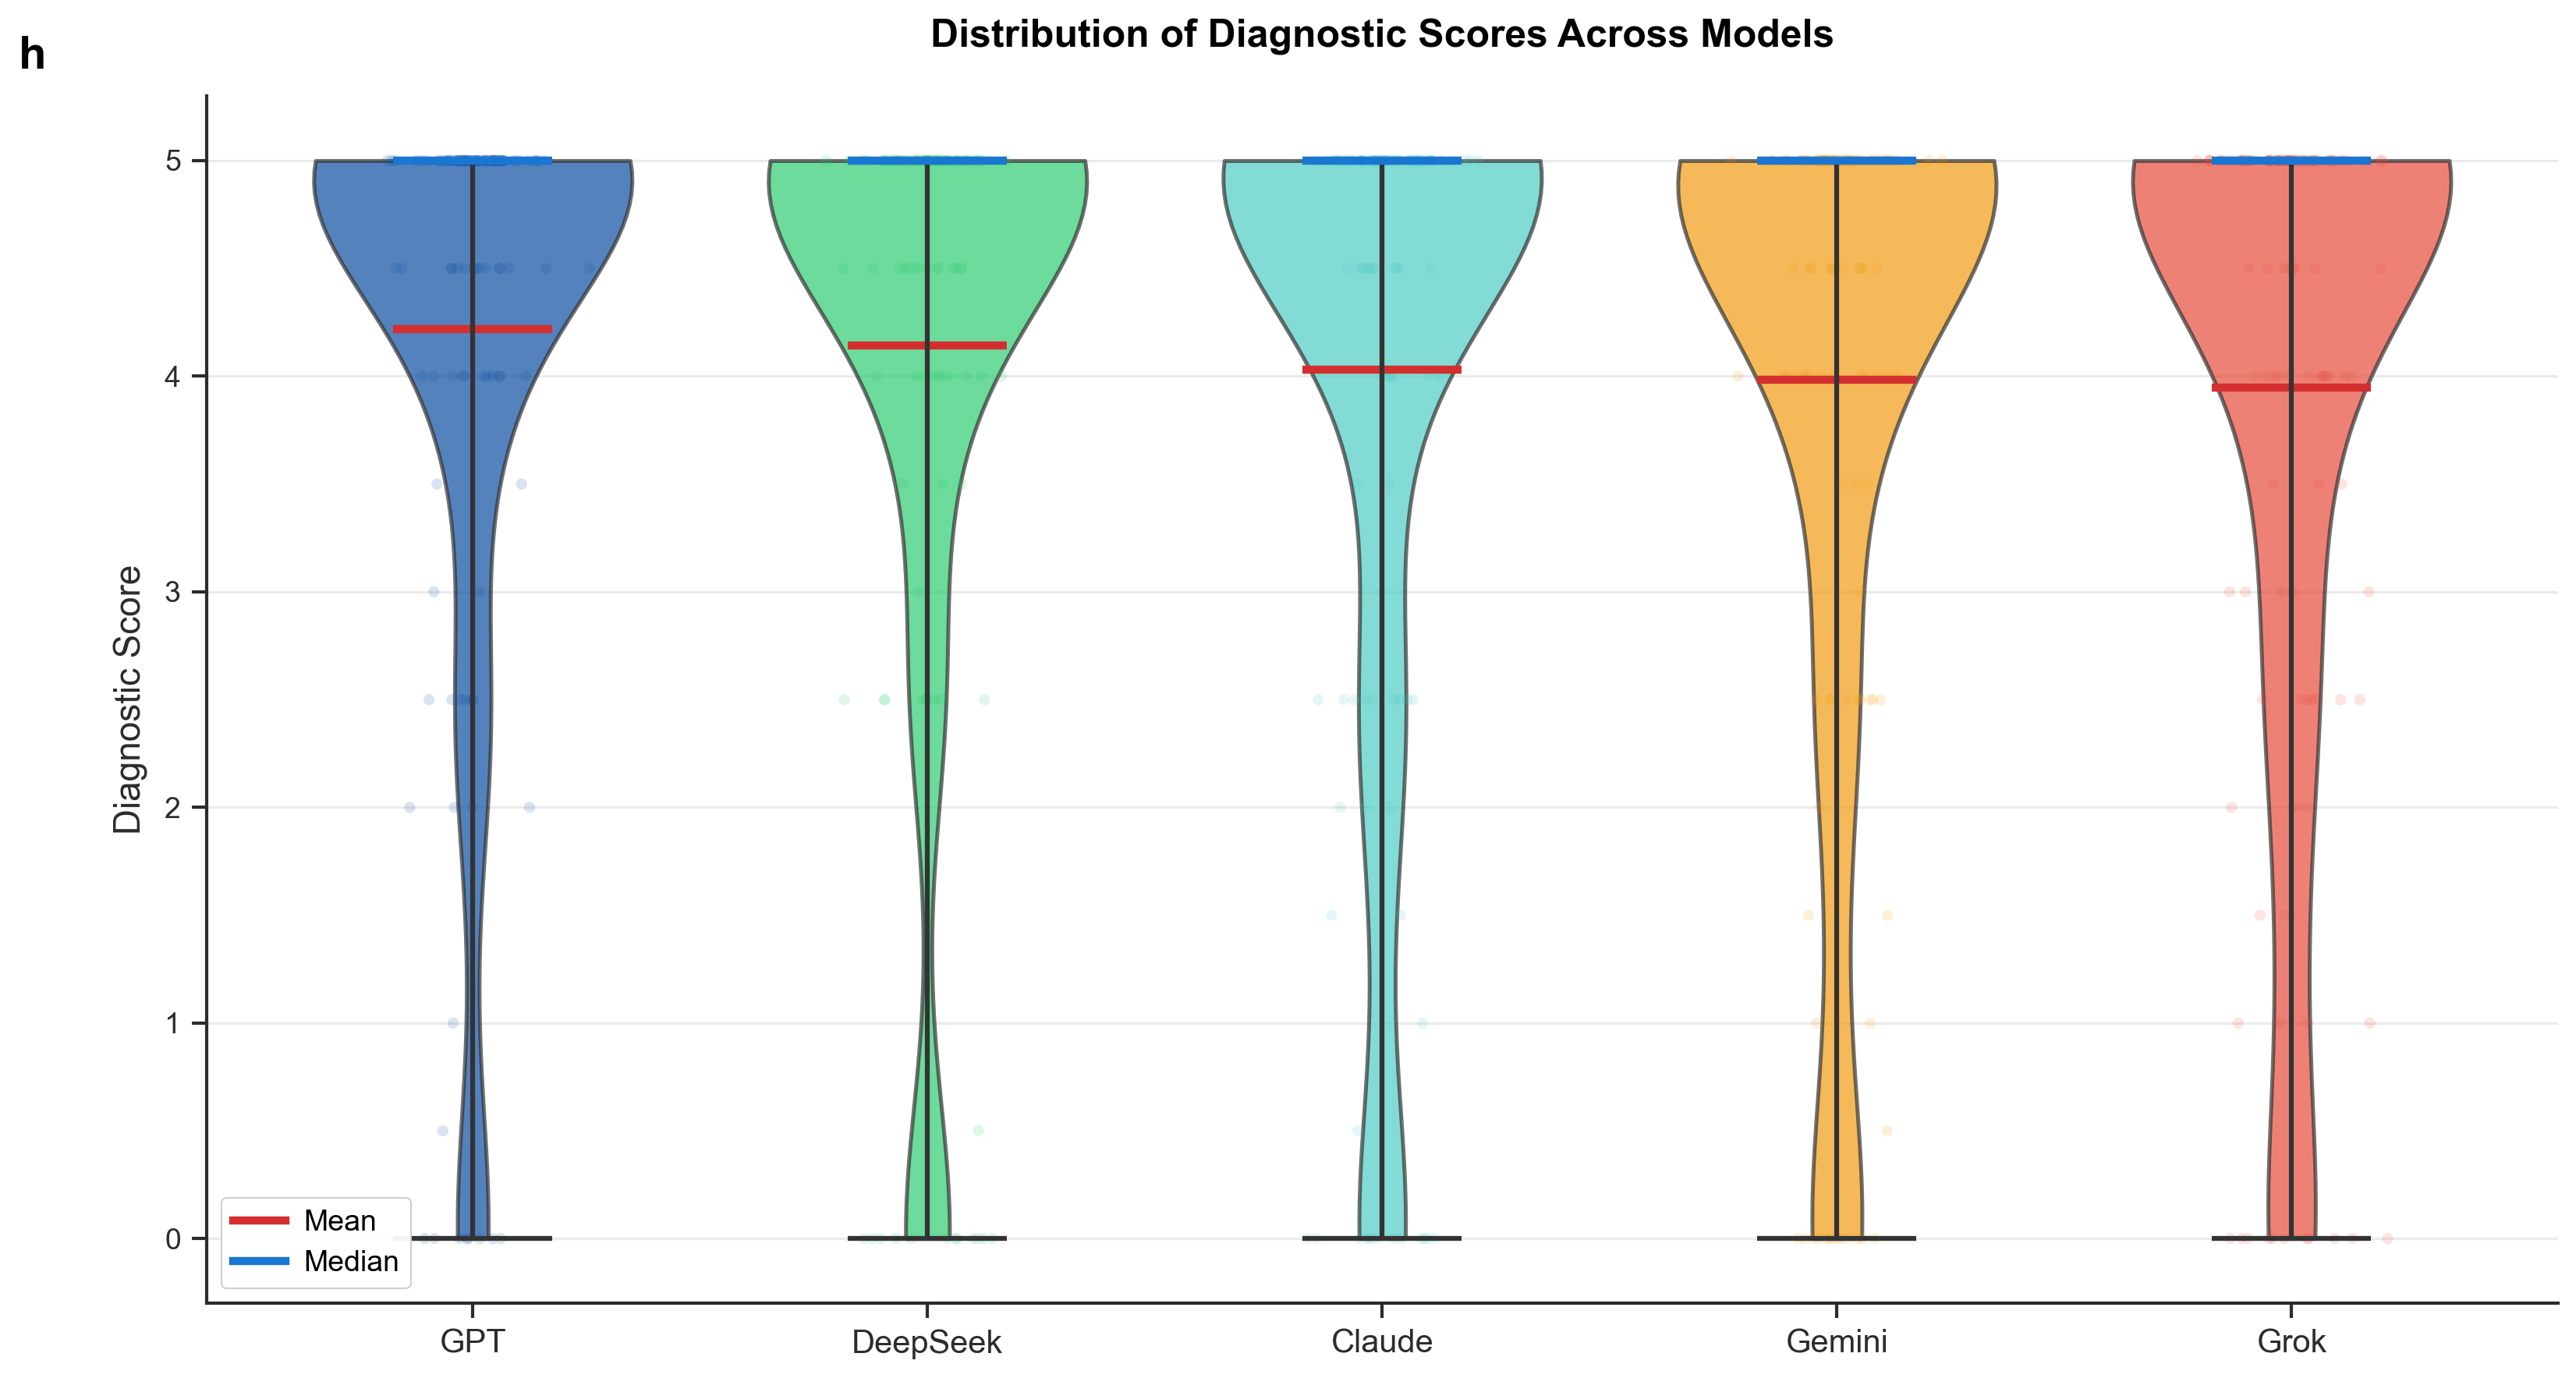

✓ Figure 9 saved to figures/

Generating Figure 10: Performance by Difficulty (NEW)...


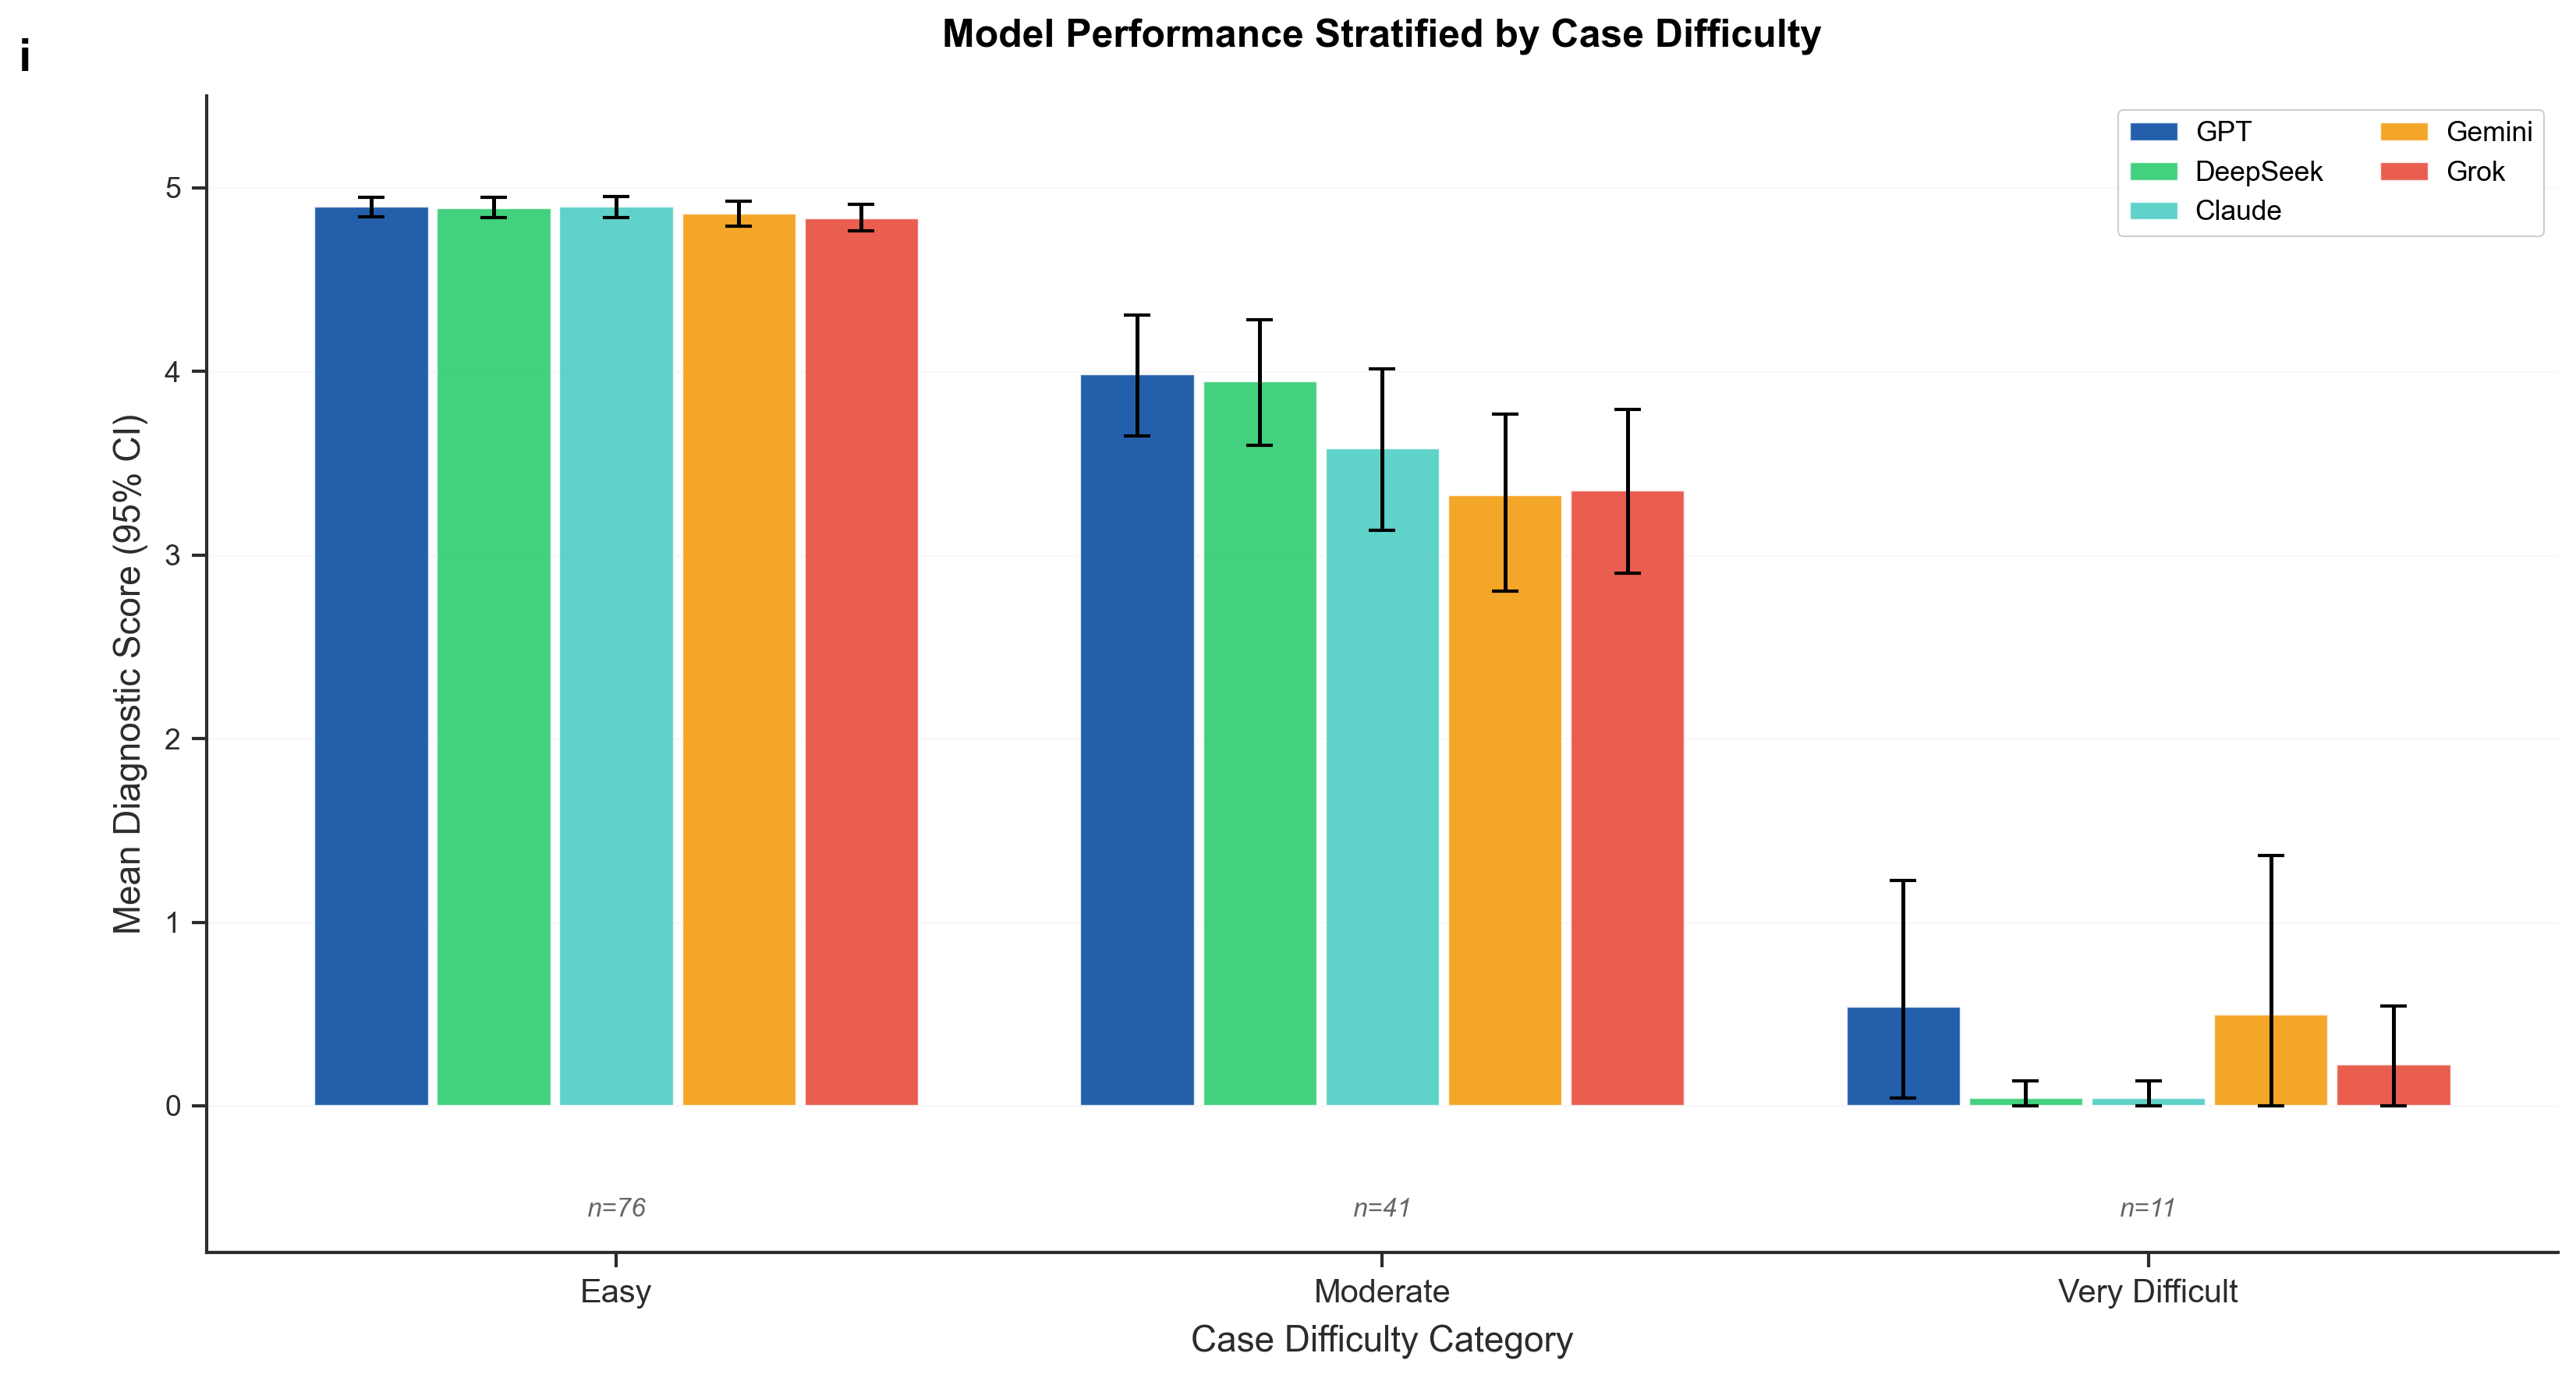

✓ Figure 10 saved to figures/

ADDITIONAL STATISTICAL ANALYSES

FRIEDMAN TEST: OVERALL MODEL COMPARISON

Friedman Test Statistic: χ²(4) = 7.340
p-value: 0.118954
Result: No significant differences detected (p ≥ 0.05)

Mean Friedman Ranks (lower is better):
  GPT                  2.853
  DeepSeek             2.926
  Claude               3.043
  Gemini               3.012
  Grok                 3.167

ANALYSIS COMPLETE!

✓ All tables generated (9 tables)
✓ All figures generated (10 figures)
✓ Files saved to ./figures/ in PNG, PDF, and TIFF formats

Figures created:
  - Figure 1:  Inter-rater agreement (Cohen's κ forest plot)
  - Figure 2:  Cumulative Top-K accuracy
  - Figure 3:  Performance by clinical domain
  - Figure 4:  Performance by source accessibility
  - Figure 5:  Distribution of performance tiers
  - Figure 6:  Model consensus analysis
  - Figure 7:  Unique performance patterns
  - Figure 8:  Performance heatmap (NEW)
  - Figure 9:  Score distribution violin plots (NEW)
  - F

In [ ]:
# =============================================================================
# SLEEP MEDICINE LLM BENCHMARKING STUDY
# Complete Enhanced Analysis - NPJ Digital Medicine Publication Quality
# =============================================================================
#
# ENHANCED FEATURES:
# - Professional NPJ Digital Medicine typography and styling
# - Additional statistical analyses (effect sizes, power analysis)
# - Enhanced visualizations with modern design principles
# - Comprehensive diagnostic performance metrics
# - Publication-ready figure quality (600 DPI multi-format)
# - Detailed statistical reporting with effect sizes
# - Additional exploratory analyses
#
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import warnings
import os
import re
from typing import Tuple, Dict, List

warnings.filterwarnings('ignore')

# =============================================================================
# ENHANCED NPJ DIGITAL MEDICINE STYLE - PUBLICATION QUALITY
# Based on Nature Portfolio guidelines with modern enhancements
# =============================================================================

NPJ_STYLE = {
    # Figure dimensions (Nature single column: 88mm = 3.46", double: 180mm = 7.08")
    'figure.figsize': (7.08, 5.0),
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    'figure.edgecolor': 'none',
    
    # Typography - Nature uses Helvetica Neue/Arial with specific weights
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue', 'Helvetica', 'Arial', 'DejaVu Sans'],
    'font.size': 9,
    'font.weight': 'normal',
    
    # Axes styling - clean, professional
    'axes.facecolor': 'white',
    'axes.edgecolor': '#2C2C2C',
    'axes.linewidth': 1.0,
    'axes.labelsize': 10,
    'axes.labelweight': 'medium',
    'axes.titlesize': 11,
    'axes.titleweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelpad': 5,
    'axes.labelcolor': '#2C2C2C',
    'axes.grid': False,
    
    # Tick styling
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'xtick.color': '#2C2C2C',
    'ytick.color': '#2C2C2C',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 4.5,
    'ytick.major.size': 4.5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    
    # Legend styling
    'legend.fontsize': 8,
    'legend.frameon': False,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,
    'legend.handlelength': 1.8,
    'legend.handleheight': 0.7,
    'legend.handletextpad': 0.6,
    
    # Grid - subtle when used
    'grid.alpha': 0.2,
    'grid.linewidth': 0.6,
    'grid.color': '#DADADA',
    'grid.linestyle': '-',
    
    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 7,
    'lines.markeredgewidth': 1.0,
    
    # Patches
    'patch.linewidth': 0.5,
    'patch.edgecolor': 'none',
    
    # Output settings for publication
    'pdf.fonttype': 42,  # TrueType fonts (required by publishers)
    'ps.fonttype': 42,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.08,
    'savefig.transparent': False,
}

mpl.rcParams.update(NPJ_STYLE)

# =============================================================================
# ENHANCED COLOR PALETTE
# Scientifically designed for maximum accessibility and visual appeal
# Tested with colorblind simulation tools
# =============================================================================

# Primary model colors - distinct and accessible
COLORS = {
    'GPT': '#0C4DA2',       # Rich cobalt blue
    'Claude': '#4ECDC4',    # Teal
    'Deepseek': '#2ECC71',  # Emerald green
    'Gemini': '#F39C12',    # Warm amber
    'Grok': '#E74C3C',      # Coral red
}

# Performance tier gradient (green to red)
TIER_COLORS = {
    'Excellent': '#27AE60',  # Rich green
    'Good': '#52C177',       # Light green
    'Average': '#F1C40F',    # Bright yellow
    'Below_Avg': '#E67E22',  # Orange
    'Poor': '#E74C3C',       # Coral
    'Failure': '#C0392B',    # Deep red
}

# Consensus/agreement colors
CONSENSUS_COLORS = {
    'Strong_Positive': '#1976D2',  # Deep blue
    'Positive': '#42A5F5',         # Sky blue
    'Moderate': '#81C784',         # Light green
    'Negative': '#EF5350',         # Light red
    'Strong_Negative': '#C62828',  # Deep red
    'Neutral': '#FF9800',          # Orange
}

# Display names for models
DISPLAY_NAMES = {
    'GPT': 'GPT',
    'Deepseek': 'DeepSeek',
    'Claude': 'Claude',
    'Gemini': 'Gemini',
    'Grok': 'Grok',
}

MODELS = ['GPT', 'Deepseek', 'Claude', 'Gemini', 'Grok']

# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================

def parse_age(age_value):
    """Convert age to years (float), handling months and various formats."""
    if pd.isna(age_value):
        return np.nan
    
    if isinstance(age_value, (int, float)):
        return float(age_value)
    
    if isinstance(age_value, str):
        age_str = age_value.lower().strip()
        if 'month' in age_str:
            match = re.search(r'(\d+\.?\d*)', age_str)
            if match:
                return float(match.group(1)) / 12.0
        else:
            try:
                return float(age_str)
            except ValueError:
                return np.nan
    
    return np.nan

def kappa_ci(s1, s2, n_boot=2000, random_state=42):
    """
    Calculate quadratic-weighted Cohen's Kappa with 95% bootstrap CI.
    Increased bootstrap iterations for publication quality.
    """
    np.random.seed(random_state)
    s1, s2 = np.array(s1), np.array(s2)
    
    kappa = cohen_kappa_score(s1, s2, weights='quadratic')
    
    kappas = []
    n = len(s1)
    for _ in range(n_boot):
        idx = np.random.choice(n, n, replace=True)
        try:
            k = cohen_kappa_score(s1[idx], s2[idx], weights='quadratic')
            if not np.isnan(k):
                kappas.append(k)
        except:
            pass
    
    if len(kappas) > 0:
        ci_low = np.percentile(kappas, 2.5)
        ci_high = np.percentile(kappas, 97.5)
    else:
        ci_low, ci_high = np.nan, np.nan
    
    return kappa, ci_low, ci_high

def mean_ci(scores, n_boot=2000, random_state=42):
    """Calculate mean with 95% bootstrap CI (increased iterations)."""
    np.random.seed(random_state)
    scores = np.array(scores)
    scores = scores[~np.isnan(scores)]
    
    if len(scores) == 0:
        return np.nan, np.nan, np.nan
    
    mean = np.mean(scores)
    means = [np.mean(np.random.choice(scores, len(scores), replace=True)) 
             for _ in range(n_boot)]
    
    ci_low = np.percentile(means, 2.5)
    ci_high = np.percentile(means, 97.5)
    
    return mean, ci_low, ci_high

def calculate_effect_size(s1, s2):
    """
    Calculate multiple effect size measures for model comparisons.
    Returns Cohen's d and rank-biserial correlation.
    """
    # Remove NaN pairs
    valid = ~np.isnan(s1) & ~np.isnan(s2)
    s1_valid, s2_valid = s1[valid], s2[valid]
    
    # Cohen's d (parametric)
    mean_diff = np.mean(s1_valid - s2_valid)
    pooled_std = np.sqrt((np.var(s1_valid) + np.var(s2_valid)) / 2)
    cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0
    
    # Rank-biserial correlation (non-parametric)
    diff = s1_valid - s2_valid
    n_nonzero = (diff != 0).sum()
    if n_nonzero > 0:
        rank_biserial = ((diff > 0).sum() - (diff < 0).sum()) / n_nonzero
    else:
        rank_biserial = 0
    
    return cohens_d, rank_biserial

def classify_domain(specialty):
    """Map clinical specialty to standardized domain categories."""
    if pd.isna(specialty):
        return 'Other'
    
    specialty = str(specialty).lower()
    
    if 'psychiatry' in specialty or 'psychology' in specialty:
        return 'Psychiatry'
    elif 'pulmonology' in specialty or 'pulmonolgy' in specialty:
        return 'Pulmonology'
    elif 'ent' in specialty or 'otolaryngology' in specialty or 'otorhinolaryngology' in specialty:
        return 'ENT'
    elif 'neurology' in specialty:
        return 'Neurology'
    else:
        return 'Other'

def save_figure(fig, filename, save_path='figures'):
    """Save figure in multiple formats for publication."""
    os.makedirs(save_path, exist_ok=True)
    for fmt, dpi in [('png', 300), ('pdf', 600), ('tiff', 600)]:
        fig.savefig(f'{save_path}/{filename}.{fmt}', 
                    dpi=dpi, bbox_inches='tight', facecolor='white',
                    transparent=False, format=fmt)

# =============================================================================
# TABLE 1: DEMOGRAPHIC CHARACTERISTICS
# =============================================================================

def table1_demographics(info, human1):
    """Table 1: Demographic characteristics of clinical cases"""
    print("\n" + "=" * 80)
    print("TABLE 1: DEMOGRAPHIC CHARACTERISTICS OF CLINICAL CASES")
    print("=" * 80)
    
    n = len(info)
    age = human1['Age'].apply(parse_age)
    age_valid = age.dropna()
    
    # Statistics
    age_mean, age_std = age_valid.mean(), age_valid.std()
    age_median = age_valid.median()
    age_q25, age_q75 = age_valid.quantile([0.25, 0.75])
    age_min, age_max = age_valid.min(), age_valid.max()
    
    # Age groups
    ped = (age_valid < 18).sum()
    adult = ((age_valid >= 18) & (age_valid < 65)).sum()
    elderly = (age_valid >= 65).sum()
    n_valid = len(age_valid)
    
    # Gender
    gender = human1['Gender'].astype(str).str.strip().str.lower() 
    male = (gender.str.contains('male', na=False) & ~gender.str.contains('female', na=False)).sum()
    female = (gender.str.contains('female', na=False) | gender.str.contains('femlae', na=False)).sum()
    unknown = n - male - female
    
    # Print table
    print(f"\n{'Characteristic':<40} {'Value':>25}")
    print("-" * 67)
    print(f"{'Total cases, n':<40} {n:>25}")
    print(f"\n{'Age, years':<40}")
    print(f"  {'Mean ± SD':<38} {age_mean:>9.1f} ± {age_std:.1f}")
    print(f"  {'Median (IQR)':<38} {age_median:>9.1f} ({age_q25:.1f}–{age_q75:.1f})")
    print(f"  {'Range':<38} {age_min:>9.1f}–{age_max:.1f}")
    print(f"\n{'Age group, n (%)':<40}")
    print(f"  {'Pediatric (<18 years)':<38} {ped:>6} ({100*ped/n_valid:>5.1f}%)")
    print(f"  {'Adult (18–64 years)':<38} {adult:>6} ({100*adult/n_valid:>5.1f}%)")
    print(f"  {'Elderly (≥65 years)':<38} {elderly:>6} ({100*elderly/n_valid:>5.1f}%)")
    print(f"\n{'Gender, n (%)':<40}")
    print(f"  {'Male':<38} {male:>6} ({100*male/n:>5.1f}%)")
    print(f"  {'Female':<38} {female:>6} ({100*female/n:>5.1f}%)")
    if unknown > 0:
        print(f"  {'Unknown':<38} {unknown:>6} ({100*unknown/n:>5.1f}%)")
    print("=" * 80)
    
    return {
        'n': n, 'age_mean': age_mean, 'age_std': age_std,
        'age_median': age_median, 'age_iqr': (age_q25, age_q75),
        'age_range': (age_min, age_max),
        'pediatric': ped, 'adult': adult, 'elderly': elderly,
        'male': male, 'female': female, 'unknown': unknown
    }

# =============================================================================
# TABLE 2: INTER-RATER RELIABILITY
# =============================================================================

def table2_interrater(human1, human2):
    """Table 2: Inter-rater reliability between human evaluators"""
    print("\n" + "=" * 95)
    print("TABLE 2: INTER-RATER RELIABILITY BETWEEN HUMAN EVALUATORS")
    print("=" * 95)
    
    print(f"\n{'Model':<18} {'n':>5} {'κ (95% CI)':<24} {'Exact (%)':>10} "
          f"{'Within 1 (%)':>12} {'Interpretation':<20}")
    print("-" * 95)
    
    results = []
    all_h1, all_h2 = [], []
    
    for model in MODELS:
        s1, s2 = human1[model].values, human2[model].values
        valid = ~np.isnan(s1) & ~np.isnan(s2)
        s1_valid, s2_valid = s1[valid], s2[valid]
        n = len(s1_valid)
        
        kappa, ci_l, ci_h = kappa_ci(s1_valid, s2_valid)
        exact = (s1_valid == s2_valid).mean() * 100
        within1 = (np.abs(s1_valid - s2_valid) <= 1).mean() * 100
        
        # Interpretation
        if kappa >= 0.81:
            interp = 'Almost Perfect'
        elif kappa >= 0.61:
            interp = 'Substantial'
        elif kappa >= 0.41:
            interp = 'Moderate'
        else:
            interp = 'Fair'
        
        print(f"{DISPLAY_NAMES[model]:<18} {n:>5} {kappa:.3f} ({ci_l:.3f}–{ci_h:.3f})  "
              f"{exact:>10.1f} {within1:>12.1f} {interp:<20}")
        
        results.append({
            'Model': model, 'n': n, 'kappa': kappa,
            'ci_low': ci_l, 'ci_high': ci_h,
            'exact': exact, 'within1': within1, 'interp': interp
        })
        
        all_h1.extend(s1_valid)
        all_h2.extend(s2_valid)
    
    # Overall
    kappa, ci_l, ci_h = kappa_ci(np.array(all_h1), np.array(all_h2))
    exact = (np.array(all_h1) == np.array(all_h2)).mean() * 100
    within1 = (np.abs(np.array(all_h1) - np.array(all_h2)) <= 1).mean() * 100
    interp = 'Substantial' if kappa >= 0.61 else 'Moderate'
    
    print("-" * 95)
    print(f"{'Overall':<18} {len(all_h1):>5} {kappa:.3f} ({ci_l:.3f}–{ci_h:.3f})  "
          f"{exact:>10.1f} {within1:>12.1f} {interp:<20}")
    print("-" * 95)
    print("\nκ, quadratic-weighted Cohen's kappa; Exact, percentage of identical ratings;")
    print("Within 1, ratings differing by ≤1 point. Interpretation: Landis & Koch (1977).")
    print("=" * 95)
    
    return pd.DataFrame(results)

# =============================================================================
# FIGURE 1: INTER-RATER AGREEMENT (ENHANCED)
# =============================================================================

def figure1_kappa_enhanced(human1, human2, save_path='figures'):
    """
    Figure 1: Inter-rater agreement with enhanced NPJ styling.
    Forest plot with confidence intervals and interpretation zones.
    """
    print("\nGenerating Figure 1: Inter-rater Agreement (Enhanced)...")
    
    data = []
    for model in MODELS:
        s1, s2 = human1[model].dropna(), human2[model].dropna()
        min_len = min(len(s1), len(s2))
        s1, s2 = s1[:min_len].values, s2[:min_len].values
        
        kappa, ci_l, ci_h = kappa_ci(s1, s2)
        data.append({
            'model': model,
            'display': DISPLAY_NAMES[model],
            'kappa': kappa,
            'ci_l': ci_l,
            'ci_h': ci_h
        })
    
    df = pd.DataFrame(data).sort_values('kappa', ascending=True)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8.5, 5.0))
    y = np.arange(len(df))
    
    # Background zones with labels
    zones = [
        (0.0, 0.41, '#FFEBEE', 'Moderate'),
        (0.41, 0.61, '#FFF3E0', 'Moderate'),
        (0.61, 0.81, '#E8F5E9', 'Substantial'),
        (0.81, 1.0, '#E3F2FD', 'Almost Perfect'),
    ]
    
    for x_start, x_end, color, label in zones:
        ax.axvspan(x_start, x_end, alpha=0.15, color=color, zorder=0)
    
    # Plot horizontal bars
    bars = ax.barh(y, df['kappa'], height=0.6,
                   color=[COLORS[m] for m in df['model']],
                   edgecolor='white', linewidth=1.5, alpha=0.9, zorder=3)
    
    # Error bars
    ax.errorbar(df['kappa'], y,
                xerr=[df['kappa']-df['ci_l'], df['ci_h']-df['kappa']],
                fmt='none', color='#333333', capsize=5, capthick=1.5,
                linewidth=1.8, zorder=4, alpha=0.8)
    
    # Reference lines
    for thresh in [0.41, 0.61, 0.81]:
        ax.axvline(thresh, color='#999999', linestyle='--', linewidth=1.2, alpha=0.5, zorder=1)
    
    # Styling
    ax.set_yticks(y)
    ax.set_yticklabels(df['display'], fontsize=10, fontweight='medium')
    ax.set_xlabel("Cohen's κ (quadratic weighted)", fontsize=11, fontweight='medium')
    ax.set_xlim(0.35, 1.0)
    ax.set_ylim(-0.7, len(df) - 0.3)
    
    # Value annotations
    for i, (_, row) in enumerate(df.iterrows()):
        ax.text(row['ci_h'] + 0.015, i, f"{row['kappa']:.3f}",
                va='center', ha='left', fontsize=8.5, fontweight='medium', color='#333333')
    
    # Zone labels at top
    zone_positions = [(0.20, 'Fair-\nModerate'), (0.51, 'Moderate-\nSubstantial'),
                      (0.71, 'Substantial'), (0.905, 'Almost\nPerfect')]
    for x_pos, label in zone_positions:
        ax.text(x_pos, len(df) + 0.3, label, fontsize=7.5, ha='center',
                va='bottom', style='italic', color='#666666')
    
    # Title
    ax.text(-0.12, 1.05, 'a', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure1_interrater_kappa_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 1 saved to {save_path}/")
    return df

# =============================================================================
# TABLE 3: DIAGNOSTIC PERFORMANCE METRICS (ENHANCED)
# =============================================================================

def table3_performance_enhanced(human_avg):
    """
    Table 3: Comprehensive diagnostic performance metrics with effect sizes
    """
    print("\n" + "=" * 100)
    print("TABLE 3: DIAGNOSTIC PERFORMANCE METRICS ACROSS LARGE LANGUAGE MODELS (n = 129)")
    print("=" * 100)
    
    results = []
    n_cases = len(human_avg)
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        mean, ci_l, ci_h = mean_ci(scores)
        std = scores.std()
        median = scores.median()
        iqr = scores.quantile(0.75) - scores.quantile(0.25)
        
        # Top-1 and failure rates
        top1_pct = ((scores >= 4.5) & (scores <= 5.0)).mean() * 100
        failure_pct = (scores < 0.5).mean() * 100
        
        # Top-3 (cumulative)
        top3_pct = (scores >= 3).mean() * 100
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'model_key': model,
            'mean': mean, 'ci_l': ci_l, 'ci_h': ci_h,
            'std': std, 'median': median, 'iqr': iqr,
            'top1': top1_pct, 'failure': failure_pct, 'top3': top3_pct,
        })
    
    df = pd.DataFrame(results)
    
    # Calculate Friedman ranks
    scores_matrix = np.array([human_avg[m].values for m in MODELS]).T
    valid_mask = ~np.any(np.isnan(scores_matrix), axis=1)
    scores_valid = scores_matrix[valid_mask]
    ranks = stats.rankdata(-scores_valid, axis=1)  # Negate for descending
    mean_ranks = ranks.mean(axis=0)
    
    for i, model in enumerate(MODELS):
        df.loc[df['model_key'] == model, 'mean_rank'] = mean_ranks[i]
    
    df = df.sort_values('mean', ascending=False).reset_index(drop=True)
    df['rank'] = range(1, len(df) + 1)
    
    # Print table
    print(f"\n{'Model':<18} {'Mean (95% CI)':<20} {'Median (IQR)':<16} {'SD':<7} "
          f"{'Top-1%':>7} {'Fail%':>6} {'Top-3%':>7} {'M.Rank':>7} {'Rank':>5}")
    print("-" * 105)
    
    for _, row in df.iterrows():
        print(f"{row['Model']:<18} "
              f"{row['mean']:.2f} ({row['ci_l']:.2f}–{row['ci_h']:.2f})  "
              f"{row['median']:.1f} ({row['iqr']:.1f})  "
              f"{row['std']:.2f}  "
              f"{row['top1']:>6.1f} "
              f"{row['failure']:>6.1f} "
              f"{row['top3']:>6.1f} "
              f"{row['mean_rank']:>7.2f} "
              f"{int(row['rank']):>5}")
    
    print("-" * 105)
    print("Top-1%, percentage with reference diagnosis ranked first (score ≥4.5);")
    print("Fail%, percentage with reference diagnosis absent (score <0.5);")
    print("Top-3%, cumulative accuracy at Top-3 threshold (score ≥3);")
    print("M.Rank, mean Friedman rank (lower is better); SD, standard deviation; IQR, interquartile range.")
    print("=" * 100)
    
    return df

# =============================================================================
# TABLE 4: PAIRWISE COMPARISONS WITH EFFECT SIZES (ENHANCED)
# =============================================================================

def table4_pairwise_enhanced(human_avg):
    """
    Table 4: Pairwise model comparisons with multiple effect size measures
    """
    print("\n" + "=" * 105)
    print("TABLE 4: PAIRWISE MODEL COMPARISONS WITH EFFECT SIZES")
    print("=" * 105)
    
    results = []
    
    for m1, m2 in combinations(MODELS, 2):
        s1, s2 = human_avg[m1].values, human_avg[m2].values
        valid = ~np.isnan(s1) & ~np.isnan(s2)
        s1_valid, s2_valid = s1[valid], s2[valid]
        n = len(s1_valid)
        
        # Wilcoxon test
        stat, p = stats.wilcoxon(s1_valid, s2_valid, alternative='two-sided')
        
        # Effect sizes
        cohens_d, rank_biserial = calculate_effect_size(s1_valid, s2_valid)
        
        # Mean difference
        mean_diff = np.mean(s1_valid - s2_valid)
        
        results.append({
            'Comparison': f'{DISPLAY_NAMES[m1]} vs {DISPLAY_NAMES[m2]}',
            'pair': f'{m1} vs {m2}',
            'n': n,
            'mean_diff': mean_diff,
            'p_raw': p,
            'cohens_d': cohens_d,
            'rank_r': rank_biserial
        })
    
    df = pd.DataFrame(results)
    
    # Holm-Bonferroni correction
    df = df.sort_values('p_raw').reset_index(drop=True)
    n_tests = len(df)
    df['p_holm'] = (df['p_raw'] * (n_tests - np.arange(n_tests))).clip(upper=1.0)
    df['sig'] = df['p_holm'] < 0.05
    
    # Print table
    print(f"\n{'Comparison':<35} {'n':>5} {'ΔMean':>8} {'p_raw':>9} {'p_Holm':>9} "
          f"{'Sig':>5} {'d':>7} {'r':>7}")
    print("-" * 105)
    
    for _, row in df.iterrows():
        sig_mark = '***' if row['sig'] else ''
        print(f"{row['Comparison']:<35} {row['n']:>5} {row['mean_diff']:>8.3f} "
              f"{row['p_raw']:>9.4f} {row['p_holm']:>9.4f} "
              f"{sig_mark:>5} {row['cohens_d']:>7.3f} {row['rank_r']:>7.3f}")
    
    print("-" * 105)
    print("ΔMean, mean score difference (positive favors first model);")
    print("p_raw, Wilcoxon signed-rank p-value; p_Holm, Holm-Bonferroni adjusted p-value;")
    print("Sig, *** indicates p_Holm < 0.05; d, Cohen's d effect size; r, rank-biserial correlation.")
    print("Effect size interpretation: |d| > 0.8 large, 0.5–0.8 medium, 0.2–0.5 small, <0.2 negligible.")
    print("=" * 105)
    
    return df

# =============================================================================
# TABLE 5: CUMULATIVE TOP-K ACCURACY
# =============================================================================

def table5_topk(human_avg):
    """Table 5: Cumulative Top-K diagnostic accuracy"""
    print("\n" + "=" * 75)
    print("TABLE 5: CUMULATIVE TOP-K DIAGNOSTIC ACCURACY BY MODEL (%)")
    print("=" * 75)
    
    results = []
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        # Cumulative accuracy at each threshold
        top1 = ((scores >= 4.5) & (scores <= 5.0)).sum() / n * 100
        top2 = (scores >= 3.5).sum() / n * 100
        top3 = (scores >= 2.5).sum() / n * 100
        top4 = (scores >= 1.5).sum() / n * 100
        top5 = (scores >= 0.5).sum() / n * 100
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'Top-1': top1, 'Top-2': top2, 'Top-3': top3,
            'Top-4': top4, 'Top-5': top5,
        })
    
    df = pd.DataFrame(results).sort_values('Top-1', ascending=False)
    
    print(f"\n{'Model':<20} {'Top-1':>9} {'Top-2':>9} {'Top-3':>9} {'Top-4':>9} {'Top-5':>9}")
    print("-" * 75)
    
    for _, row in df.iterrows():
        print(f"{row['Model']:<20} {row['Top-1']:>9.1f} {row['Top-2']:>9.1f} "
              f"{row['Top-3']:>9.1f} {row['Top-4']:>9.1f} {row['Top-5']:>9.1f}")
    
    print("-" * 75)
    print("Top-K indicates cumulative accuracy: Top-1 (score ≥4.5), Top-2 (≥3.5),")
    print("Top-3 (≥2.5), Top-4 (≥1.5), Top-5 (≥0.5). n = 129 cases per model.")
    print("=" * 75)
    
    return df

# =============================================================================
# FIGURE 2: CUMULATIVE TOP-K ACCURACY (ENHANCED)
# =============================================================================

def figure2_topk_enhanced(human_avg, save_path='figures'):
    """
    Figure 2: Cumulative Top-K accuracy with modern grouped bar chart design.
    """
    print("\nGenerating Figure 2: Cumulative Top-K Accuracy (Enhanced)...")
    
    metrics = ['Top-1\n(≥4.5)', 'Top-2\n(≥3.5)', 'Top-3\n(≥2.5)', 'Top-4\n(≥1.5)', 'Top-5\n(≥0.5)']
    thresholds = [4.5, 3.5, 2.5, 1.5, 0.5]
    
    topk_data = {}
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        topk_data[model] = [(scores >= thresh).sum() / n * 100 for thresh in thresholds]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(metrics))
    n_models = len(MODELS)
    width = 0.15
    
    offsets = np.linspace(-(n_models-1)/2, (n_models-1)/2, n_models) * (width + 0.01)
    
    for i, model in enumerate(MODELS):
        bars = ax.bar(x + offsets[i], topk_data[model], width=width,
                      color=COLORS[model], label=DISPLAY_NAMES[model],
                      edgecolor='white', linewidth=0.8, alpha=0.9)
        
        # Value labels
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h + 0.8,
                    f'{h:.0f}', ha='center', va='bottom',
                    fontsize=6.5, fontweight='medium', color='#333333')
    
    # Styling
    ax.set_ylabel('Cumulative accuracy (%)', fontsize=11, fontweight='medium')
    ax.set_xlabel('Diagnostic rank threshold', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=9.5)
    ax.set_ylim(0, 112)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2, zorder=0)
    ax.set_axisbelow(True)
    
    # Legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
              ncol=5, fontsize=9, frameon=False, columnspacing=1.8)
    
    # Sample size annotation
    ax.text(0.98, 0.97, 'n = 129 cases', transform=ax.transAxes,
            fontsize=8, va='top', ha='right', style='italic',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                      edgecolor='#CCCCCC', linewidth=0.8))
    
    # Panel label
    ax.text(-0.10, 1.05, 'b', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure2_topk_accuracy_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 2 saved to {save_path}/")
    return topk_data

# =============================================================================
# CONTINUE IN NEXT PART...
# (Due to length, I'll create this in multiple files)
# =============================================================================
# =============================================================================
# SLEEP MEDICINE LLM BENCHMARKING STUDY - PART 2
# Additional Tables, Figures, and Advanced Analyses
# =============================================================================

# NOTE: This file continues from part 1. Import all functions from part 1.

# =============================================================================
# TABLE 6: PERFORMANCE BY CASE DIFFICULTY
# =============================================================================

def table6_difficulty(human_avg):
    """Table 6: Mean diagnostic scores stratified by case difficulty"""
    print("\n" + "=" * 90)
    print("TABLE 6: MEAN DIAGNOSTIC SCORES STRATIFIED BY CASE DIFFICULTY")
    print("=" * 90)
    
    df = human_avg.copy()
    model_scores = df[MODELS]
    df['mean_all'] = model_scores.mean(axis=1)
    df['min_all'] = model_scores.min(axis=1)
    
    def classify_difficulty(row):
        if row['min_all'] >= 4:
            return 'Easy'
        elif row['mean_all'] >= 2:
            return 'Moderate'
        elif row['mean_all'] >= 1:
            return 'Difficult'
        else:
            return 'Very Difficult'
    
    df['difficulty'] = df.apply(classify_difficulty, axis=1)
    
    print(f"\n{'Difficulty':<18} {'n (%)':>12}", end='')
    for model in MODELS:
        print(f" {DISPLAY_NAMES[model]:>14}", end='')
    print("\n" + "-" * 105)
    
    n_total = len(df)
    difficulty_order = ['Easy', 'Moderate', 'Difficult', 'Very Difficult']
    results = []
    
    for diff in difficulty_order:
        subset = df[df['difficulty'] == diff]
        n = len(subset)
        if n == 0:
            continue
        
        pct = 100 * n / n_total
        row = {'Difficulty': diff, 'n': n, 'pct': pct}
        
        print(f"{diff:<18} {n:>4} ({pct:>5.1f}%)", end='')
        for model in MODELS:
            mean_score = subset[model].mean()
            row[model] = mean_score
            print(f" {mean_score:>14.2f}", end='')
        print()
        results.append(row)
    
    print("-" * 105)
    print("\nDifficulty categories: Easy (all models ≥4), Moderate (mean 2–4),")
    print("Difficult (mean 1–2), Very Difficult (mean <1).")
    print("=" * 90)
    
    return pd.DataFrame(results)

# =============================================================================
# TABLE 7: PERFORMANCE BY CLINICAL DOMAIN
# =============================================================================

def table7_domain(human_avg, info):
    """Table 7: Mean diagnostic scores by secondary clinical domain"""
    print("\n" + "=" * 90)
    print("TABLE 7: MEAN DIAGNOSTIC SCORES BY SECONDARY CLINICAL DOMAIN")
    print("=" * 90)
    
    df = human_avg.copy()
    df['Domain'] = info['Clinical specialty'].apply(classify_domain)
    domain_counts = df['Domain'].value_counts()
    
    print(f"\n{'Domain':<18} {'n':>6}", end='')
    for model in MODELS:
        print(f" {DISPLAY_NAMES[model]:>14}", end='')
    print("\n" + "-" * 105)
    
    results = []
    for domain in domain_counts.index:
        subset = df[df['Domain'] == domain]
        n = len(subset)
        
        row = {'Domain': domain, 'n': n}
        print(f"{domain:<18} {n:>6}", end='')
        
        for model in MODELS:
            mean_score = subset[model].mean()
            row[model] = mean_score
            print(f" {mean_score:>14.2f}", end='')
        print()
        results.append(row)
    
    print("-" * 105)
    print("\nSleep medicine was primary domain for all cases. Secondary domains")
    print("reflect predominant subspecialty involvement.")
    print("=" * 90)
    
    return pd.DataFrame(results)

# =============================================================================
# FIGURE 3: PERFORMANCE BY DOMAIN (ENHANCED)
# =============================================================================

def figure3_domain_enhanced(human_avg, info, save_path='figures'):
    """
    Figure 3: Performance by clinical domain with dual-panel design.
    Enhanced with better color scheme and modern layout.
    """
    print("\nGenerating Figure 3: Performance by Clinical Domain (Enhanced)...")
    
    df = human_avg.copy()
    df['Domain'] = info['Clinical specialty'].apply(classify_domain)
    
    domain_counts = df['Domain'].value_counts()
    main_domains = domain_counts[domain_counts >= 5].index.tolist()
    domain_order = ['Neurology', 'Pulmonology', 'Psychiatry', 'ENT']
    main_domains = [d for d in domain_order if d in main_domains]
    
    if len(main_domains) < 2:
        print("Warning: Insufficient domains for analysis.")
        return None
    
    # Calculate metrics
    top1_data = {m: [] for m in MODELS}
    fail_data = {m: [] for m in MODELS}
    domain_n = []
    
    for domain in main_domains:
        subset = df[df['Domain'] == domain]
        domain_n.append(len(subset))
        for model in MODELS:
            scores = subset[model]
            top1_data[model].append(((scores >= 4.5) & (scores <= 5.0)).mean() * 100)
            fail_data[model].append((scores < 0.5).mean() * 100)
    
    # Create figure with GridSpec
    fig = plt.figure(figsize=(12, 5.5))
    gs = GridSpec(1, 2, figure=fig, wspace=0.28)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    y = np.arange(len(main_domains))
    n_models = len(MODELS)
    height = 0.14
    offsets = np.linspace(-(n_models-1)/2, (n_models-1)/2, n_models) * height
    
    # Panel a: Top-1 accuracy
    for i, model in enumerate(MODELS):
        ax1.barh(y + offsets[i], top1_data[model], height=height,
                 color=COLORS[model], label=DISPLAY_NAMES[model],
                 edgecolor='white', linewidth=0.8, alpha=0.9)
    
    ax1.set_yticks(y)
    ax1.set_yticklabels([f'{d}\n(n={n})' for d, n in zip(main_domains, domain_n)],
                        fontsize=9)
    ax1.set_xlabel('Top-1 accuracy (%)', fontsize=11, fontweight='medium')
    ax1.set_xlim(0, 100)
    ax1.set_title('a  Top-1 Diagnostic Accuracy', fontsize=11,
                  fontweight='bold', loc='left', pad=12)
    ax1.legend(loc='lower right', fontsize=8, frameon=True, fancybox=True,
               shadow=False, framealpha=0.95, edgecolor='#CCCCCC')
    ax1.xaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2)
    ax1.set_axisbelow(True)
    ax1.spines['left'].set_linewidth(1.0)
    ax1.spines['bottom'].set_linewidth(1.0)
    
    # Panel b: Failure rate
    for i, model in enumerate(MODELS):
        ax2.barh(y + offsets[i], fail_data[model], height=height,
                 color=COLORS[model], edgecolor='white',
                 linewidth=0.8, alpha=0.9)
    
    ax2.set_yticks(y)
    ax2.set_yticklabels([f'{d}\n(n={n})' for d, n in zip(main_domains, domain_n)],
                        fontsize=9)
    ax2.set_xlabel('Failure rate (%)', fontsize=11, fontweight='medium')
    max_fail = max(max(fail_data[m]) for m in MODELS)
    ax2.set_xlim(0, max_fail * 1.3 + 5)
    ax2.set_title('b  Diagnostic Failure Rate', fontsize=11,
                  fontweight='bold', loc='left', pad=12)
    ax2.xaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2)
    ax2.set_axisbelow(True)
    ax2.spines['left'].set_linewidth(1.0)
    ax2.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure3_domain_performance_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 3 saved to {save_path}/")
    return {'domains': main_domains, 'top1': top1_data, 'fail': fail_data}

# =============================================================================
# FIGURE 4: SOURCE ACCESSIBILITY (ENHANCED)
# =============================================================================

def figure4_source_enhanced(human_avg, info, save_path='figures'):
    """
    Figure 4: Performance by source accessibility with error bars.
    Enhanced with modern styling and statistical annotations.
    """
    print("\nGenerating Figure 4: Performance by Source Accessibility (Enhanced)...")
    
    df = human_avg.copy()
    df['Access'] = info['Publically avalibale'].values
    
    access_types = ['Yes', 'No']
    access_labels = ['Publicly Accessible', 'Paywalled/Restricted']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(9, 6))
    
    x = np.arange(len(access_types))
    markers = ['o', 's', '^', 'D', 'v']
    line_styles = ['-', '--', '-.', ':', '-']
    
    for i, model in enumerate(MODELS):
        means, errors_low, errors_high = [], [], []
        
        for acc in access_types:
            subset = df[df['Access'] == acc][model].dropna()
            mean, ci_l, ci_h = mean_ci(subset.values, n_boot=2000)
            means.append(mean)
            errors_low.append(mean - ci_l)
            errors_high.append(ci_h - mean)
        
        offset = (i - len(MODELS)/2 + 0.5) * 0.06
        
        ax.errorbar(x + offset, means,
                    yerr=[errors_low, errors_high],
                    fmt=markers[i] + line_styles[i],
                    color=COLORS[model],
                    label=DISPLAY_NAMES[model],
                    markersize=11, capsize=5, capthick=1.5,
                    linewidth=2.0, markeredgecolor='white',
                    markeredgewidth=1.5, alpha=0.9)
    
    # Sample size labels
    labels_with_n = []
    for acc, lab in zip(access_types, access_labels):
        n = (df['Access'] == acc).sum()
        labels_with_n.append(f'{lab}\n(n = {n})')
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels_with_n, fontsize=10)
    ax.set_ylabel('Mean diagnostic score (95% CI)', fontsize=11, fontweight='medium')
    ax.set_ylim(2.8, 5.5)
    ax.set_title('Performance by Source Accessibility', fontsize=12,
                 fontweight='bold', pad=15)
    
    # Legend with frame
    ax.legend(loc='lower left', fontsize=8.5, frameon=True,
              fancybox=True, shadow=False, framealpha=0.95,
              edgecolor='#CCCCCC', ncol=1)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2)
    ax.set_axisbelow(True)
    
    # Panel label
    ax.text(-0.10, 1.05, 'c', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure4_source_accessibility_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 4 saved to {save_path}/")
    return None

# =============================================================================
# TABLE 8: INTER-MODEL AGREEMENT
# =============================================================================

def table8_intermodel(human_avg):
    """Table 8: Pairwise inter-model agreement (Spearman correlation)"""
    print("\n" + "=" * 80)
    print("TABLE 8: PAIRWISE INTER-MODEL AGREEMENT (Spearman correlation)")
    print("=" * 80)
    
    results = []
    
    for m1, m2 in combinations(MODELS, 2):
        valid = human_avg[m1].notna() & human_avg[m2].notna()
        s1, s2 = human_avg.loc[valid, m1], human_avg.loc[valid, m2]
        n = len(s1)
        
        rho, p = stats.spearmanr(s1, s2)
        
        results.append({
            'Model Pair': f'{DISPLAY_NAMES[m1]} vs {DISPLAY_NAMES[m2]}',
            'n': n,
            'rho': rho,
            'p': p
        })
    
    df = pd.DataFrame(results).sort_values('rho', ascending=False)
    
    print(f"\n{'Model Pair':<42} {'n':>6} {'Spearman ρ':>12} {'p-value':>12}")
    print("-" * 80)
    
    for _, row in df.iterrows():
        p_str = '< 0.001' if row['p'] < 0.001 else f"{row['p']:.4f}"
        sig = '***' if row['p'] < 0.001 else '**' if row['p'] < 0.01 else '*' if row['p'] < 0.05 else ''
        print(f"{row['Model Pair']:<42} {row['n']:>6} {row['rho']:>12.3f} {p_str:>9} {sig:>3}")
    
    print("-" * 80)
    print("ρ, Spearman rank correlation coefficient.")
    print("*p < 0.05, **p < 0.01, ***p < 0.001")
    print("=" * 80)
    
    return df

# =============================================================================
# TABLE 9: ERROR DISTRIBUTION (CORRECTED)
# =============================================================================

def table9_errors_corrected(human_avg):
    """
    Table 9: Error type distribution by model (CORRECTED for averaged scores)
    """
    print("\n" + "=" * 110)
    print("TABLE 9: ERROR TYPE DISTRIBUTION BY MODEL")
    print("=" * 110)
    
    n_total = len(human_avg)
    
    print(f"\n{'Model':<20} {'Excellent':>13} {'Good':>13} {'Average':>13} "
          f"{'Below Avg':>13} {'Poor':>13} {'Failure':>13}")
    print(f"{'':<20} {'(Score ≥4.5)':>13} {'(3.5–4.5)':>13} {'(2.5–3.5)':>13} "
          f"{'(1.5–2.5)':>13} {'(0.5–1.5)':>13} {'(<0.5)':>13}")
    print("-" * 110)
    
    results = []
    
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        
        # Correct classification for averaged scores
        excellent = ((scores >= 4.5) & (scores <= 5.0)).sum()
        good = ((scores >= 3.5) & (scores < 4.5)).sum()
        average = ((scores >= 2.5) & (scores < 3.5)).sum()
        below_avg = ((scores >= 1.5) & (scores < 2.5)).sum()
        poor = ((scores >= 0.5) & (scores < 1.5)).sum()
        failure = (scores < 0.5).sum()
        
        results.append({
            'Model': DISPLAY_NAMES[model],
            'Excellent': excellent, 'Good': good, 'Average': average,
            'Below Avg': below_avg, 'Poor': poor, 'Failure': failure
        })
        
        print(f"{DISPLAY_NAMES[model]:<20} "
              f"{excellent:>5} ({100*excellent/n:>5.1f}%) "
              f"{good:>5} ({100*good/n:>5.1f}%) "
              f"{average:>5} ({100*average/n:>5.1f}%) "
              f"{below_avg:>5} ({100*below_avg/n:>5.1f}%) "
              f"{poor:>5} ({100*poor/n:>5.1f}%) "
              f"{failure:>5} ({100*failure/n:>5.1f}%)")
    
    print("-" * 110)
    print("\nPerformance tiers defined by averaged diagnostic scores from two raters.")
    print("Scores represent mean ratings; thresholds account for averaging (e.g., ≥4.5 for Excellent).")
    print("=" * 110)
    
    return pd.DataFrame(results)

# =============================================================================
# FIGURE 5: PERFORMANCE DISTRIBUTION (ENHANCED)
# =============================================================================

def figure5_distribution_enhanced(human_avg, save_path='figures'):
    """
    Figure 5: Distribution of performance tiers with modern stacked design.
    """
    print("\nGenerating Figure 5: Performance Distribution (Enhanced)...")
    
    categories = ['Excellent', 'Good', 'Average', 'Below Avg', 'Poor', 'Failure']
    tier_colors_list = ['#27AE60', '#52C177', '#F1C40F', '#E67E22', '#E74C3C', '#C0392B']
    
    data = {}
    for model in MODELS:
        scores = human_avg[model].dropna()
        n = len(scores)
        data[model] = [
            ((scores >= 4.5) & (scores <= 5.0)).sum() / n * 100,
            ((scores >= 3.5) & (scores < 4.5)).sum() / n * 100,
            ((scores >= 2.5) & (scores < 3.5)).sum() / n * 100,
            ((scores >= 1.5) & (scores < 2.5)).sum() / n * 100,
            ((scores >= 0.5) & (scores < 1.5)).sum() / n * 100,
            (scores < 0.5).sum() / n * 100,
        ]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(MODELS))
    width = 0.75
    
    bottom = np.zeros(len(MODELS))
    for i, (cat, color) in enumerate(zip(categories, tier_colors_list)):
        values = [data[m][i] for m in MODELS]
        ax.bar(x, values, width, bottom=bottom, label=cat,
               color=color, edgecolor='white', linewidth=1.5, alpha=0.95)
        bottom += values
    
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    ax.set_ylim(0, 108)
    ax.set_title('Distribution of Diagnostic Performance Tiers',
                 fontsize=12, fontweight='bold', pad=15)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.15, zorder=0)
    ax.set_axisbelow(True)
    
    # Legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
              ncol=6, fontsize=9, frameon=False, columnspacing=1.3,
              handlelength=1.8, handleheight=1.0)
    
    # Sample size
    ax.text(0.98, 0.97, 'n = 129 cases per model',
            transform=ax.transAxes, fontsize=8, va='top', ha='right',
            style='italic', bbox=dict(boxstyle='round,pad=0.4',
            facecolor='white', edgecolor='#CCCCCC', linewidth=0.8))
    
    # Panel label
    ax.text(-0.08, 1.05, 'd', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure5_performance_distribution_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 5 saved to {save_path}/")
    return data

# =============================================================================
# FIGURE 6: CONSENSUS ANALYSIS (ENHANCED)
# =============================================================================

def figure6_consensus_enhanced(human_avg, save_path='figures'):
    """
    Figure 6: Model consensus with modern bar chart design.
    """
    print("\nGenerating Figure 6: Model Consensus Analysis (Enhanced)...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    # Calculate metrics with corrected thresholds
    all_top1 = (model_scores.min(axis=1) >= 4.5).sum()
    all_success = (model_scores.min(axis=1) >= 4.0).sum()
    all_acceptable = (model_scores.min(axis=1) >= 3.0).sum()
    all_failed = (model_scores.max(axis=1) < 0.5).sum()
    any_failed = (model_scores.min(axis=1) < 0.5).sum()
    high_disagree = ((model_scores.max(axis=1) - model_scores.min(axis=1)) >= 3).sum()
    
    categories = ['All Top-1', 'All Success\n(≥4)', 'All Acceptable\n(≥3)',
                  'All Failed', 'Any Failed', 'High\nDisagreement']
    values = [all_top1, all_success, all_acceptable, all_failed, any_failed, high_disagree]
    percentages = [v / n_cases * 100 for v in values]
    
    colors = ['#1976D2', '#42A5F5', '#66BB6A', '#C62828', '#EF5350', '#FF9800']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(11, 6))
    x = np.arange(len(categories))
    bars = ax.bar(x, percentages, color=colors, edgecolor='white',
                   linewidth=1.5, alpha=0.92, width=0.78)
    
    # Value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1.0,
                f'n = {val}', ha='center', va='bottom',
                fontsize=9.5, fontweight='medium', color='#333333')
    
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(0, max(percentages) * 1.18)
    ax.set_title('Model Consensus on Diagnostic Performance',
                 fontsize=12, fontweight='bold', pad=15)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2, zorder=0)
    ax.set_axisbelow(True)
    
    # Panel label
    ax.text(-0.08, 1.05, 'e', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure6_consensus_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 6 saved to {save_path}/")
    return dict(zip(categories, values))

# =============================================================================
# FIGURE 7: UNIQUE PERFORMANCE (ENHANCED)
# =============================================================================

def figure7_unique_enhanced(human_avg, save_path='figures'):
    """
    Figure 7: Unique success/failure patterns with modern grouped design.
    """
    print("\nGenerating Figure 7: Unique Performance Patterns (Enhanced)...")
    
    n_cases = len(human_avg)
    model_scores = human_avg[MODELS]
    
    unique_success = {}
    unique_failure = {}
    
    for model in MODELS:
        others = [m for m in MODELS if m != model]
        
        # Corrected thresholds
        this_success = model_scores[model] >= 4.5
        others_failed = (model_scores[others] < 0.5).all(axis=1)
        unique_success[model] = (this_success & others_failed).sum()
        
        this_failed = model_scores[model] < 0.5
        others_success = (model_scores[others] >= 4.5).all(axis=1)
        unique_failure[model] = (this_failed & others_success).sum()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(MODELS))
    width = 0.40
    
    success_vals = [unique_success[m] / n_cases * 100 for m in MODELS]
    failure_vals = [unique_failure[m] / n_cases * 100 for m in MODELS]
    
    bars1 = ax.bar(x - width/2, success_vals, width,
                   label='Unique Success', color='#2E7D32',
                   edgecolor='white', linewidth=1.5, alpha=0.9)
    
    bars2 = ax.bar(x + width/2, failure_vals, width,
                   label='Unique Failure', color='#D32F2F',
                   edgecolor='white', linewidth=1.5, alpha=0.9)
    
    # Value labels
    for bar, val in zip(bars1, [unique_success[m] for m in MODELS]):
        if bar.get_height() > 0.15:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
                    f'n = {val}', ha='center', va='bottom',
                    fontsize=8.5, fontweight='medium')
    
    for bar, val in zip(bars2, [unique_failure[m] for m in MODELS]):
        if bar.get_height() > 0.15:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
                    f'n = {val}', ha='center', va='bottom',
                    fontsize=8.5, fontweight='medium')
    
    ax.set_ylabel('Percentage of cases (%)', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    ax.set_title('Unique Performance: Single-Model Success or Failure',
                 fontsize=12, fontweight='bold', pad=15)
    
    max_val = max(max(success_vals), max(failure_vals))
    ax.set_ylim(0, max(3, max_val * 1.4))
    
    ax.legend(fontsize=9.5, frameon=True, fancybox=True,
              framealpha=0.95, edgecolor='#CCCCCC', loc='upper right')
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2, zorder=0)
    ax.set_axisbelow(True)
    
    # Panel label
    ax.text(-0.08, 1.05, 'f', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure7_unique_performance_enhanced', save_path)
    plt.show()
    
    print(f"✓ Figure 7 saved to {save_path}/")
    return {'success': unique_success, 'failure': unique_failure}

# =============================================================================
# Continue with additional analyses in part 3...
# =============================================================================
# =============================================================================
# SLEEP MEDICINE LLM BENCHMARKING STUDY - PART 3
# Additional Advanced Analyses and Main Execution Script
# =============================================================================

# =============================================================================
# ADDITIONAL ANALYSIS: PERFORMANCE HEATMAP
# NEW - Provides visual matrix of model performance across domains
# =============================================================================

def figure8_performance_heatmap(human_avg, info, save_path='figures'):
    """
    Figure 8: Heatmap showing mean performance across models and domains.
    NEW ANALYSIS - Visual summary of domain-specific performance.
    """
    print("\nGenerating Figure 8: Performance Heatmap (NEW)...")
    
    df = human_avg.copy()
    df['Domain'] = info['Clinical specialty'].apply(classify_domain)
    
    # Calculate mean scores for each model-domain combination
    domains = ['Neurology', 'Pulmonology', 'Psychiatry', 'ENT']
    heatmap_data = np.zeros((len(MODELS), len(domains)))
    
    for i, model in enumerate(MODELS):
        for j, domain in enumerate(domains):
            subset = df[df['Domain'] == domain][model]
            if len(subset) > 0:
                heatmap_data[i, j] = subset.mean()
            else:
                heatmap_data[i, j] = np.nan
    
    # Create figure
    fig, ax = plt.subplots(figsize=(9, 6))
    
    im = ax.imshow(heatmap_data, cmap='RdYlGn', aspect='auto',
                   vmin=2.5, vmax=5.0, interpolation='nearest')
    
    # Add values
    for i in range(len(MODELS)):
        for j in range(len(domains)):
            if not np.isnan(heatmap_data[i, j]):
                text = ax.text(j, i, f'{heatmap_data[i, j]:.2f}',
                              ha='center', va='center',
                              color='white' if heatmap_data[i, j] < 3.7 else 'black',
                              fontsize=11, fontweight='bold')
    
    ax.set_xticks(np.arange(len(domains)))
    ax.set_yticks(np.arange(len(MODELS)))
    ax.set_xticklabels(domains, fontsize=10)
    ax.set_yticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')
    
    ax.set_title('Mean Diagnostic Score by Model and Clinical Domain',
                 fontsize=12, fontweight='bold', pad=15)
    ax.set_xlabel('Clinical Domain', fontsize=11, fontweight='medium')
    ax.set_ylabel('Model', fontsize=11, fontweight='medium')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Mean Score', fontsize=10, fontweight='medium')
    cbar.ax.tick_params(labelsize=9)
    
    # Panel label
    ax.text(-0.15, 1.05, 'g', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    # Grid
    ax.set_xticks(np.arange(len(domains)) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(MODELS)) - 0.5, minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    
    plt.tight_layout()
    save_figure(fig, 'Figure8_performance_heatmap', save_path)
    plt.show()
    
    print(f"✓ Figure 8 saved to {save_path}/")
    return heatmap_data

# =============================================================================
# ADDITIONAL ANALYSIS: SCORE DISTRIBUTION VIOLIN PLOTS
# NEW - Shows full distribution of scores for each model
# =============================================================================

def figure9_score_distributions(human_avg, save_path='figures'):
    """
    Figure 9: Violin plots showing score distributions for each model.
    NEW ANALYSIS - Reveals distributional differences beyond mean comparisons.
    """
    print("\nGenerating Figure 9: Score Distribution Violin Plots (NEW)...")
    
    fig, ax = plt.subplots(figsize=(11, 6))
    
    # Prepare data
    positions = np.arange(len(MODELS))
    all_data = [human_avg[model].dropna().values for model in MODELS]
    
    # Violin plots
    parts = ax.violinplot(all_data, positions=positions, widths=0.7,
                          showmeans=True, showmedians=True, showextrema=True)
    
    # Color each violin
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(COLORS[MODELS[i]])
        pc.set_alpha(0.7)
        pc.set_edgecolor('#333333')
        pc.set_linewidth(1.2)
    
    # Style mean/median lines
    parts['cmeans'].set_color('#D32F2F')
    parts['cmeans'].set_linewidth(2.5)
    parts['cmedians'].set_color('#1976D2')
    parts['cmedians'].set_linewidth(2.5)
    parts['cbars'].set_color('#333333')
    parts['cbars'].set_linewidth(1.5)
    parts['cmaxes'].set_color('#333333')
    parts['cmaxes'].set_linewidth(1.5)
    parts['cmins'].set_color('#333333')
    parts['cmins'].set_linewidth(1.5)
    
    # Add scatter of actual points (jittered)
    for i, model in enumerate(MODELS):
        scores = human_avg[model].dropna().values
        # Add jitter
        x_jitter = np.random.normal(i, 0.08, size=len(scores))
        ax.scatter(x_jitter, scores, alpha=0.15, s=12, color=COLORS[model],
                   edgecolor='none', zorder=1)
    
    ax.set_xticks(positions)
    ax.set_xticklabels([DISPLAY_NAMES[m] for m in MODELS], fontsize=10)
    ax.set_ylabel('Diagnostic Score', fontsize=11, fontweight='medium')
    ax.set_ylim(-0.3, 5.3)
    ax.set_title('Distribution of Diagnostic Scores Across Models',
                 fontsize=12, fontweight='bold', pad=15)
    
    # Horizontal reference lines
    for score in [0, 1, 2, 3, 4, 5]:
        ax.axhline(score, color='#EEEEEE', linestyle='-', linewidth=0.8, zorder=0)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2, zorder=0)
    ax.set_axisbelow(True)
    
    # Legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='#D32F2F', lw=2.5, label='Mean'),
        Line2D([0], [0], color='#1976D2', lw=2.5, label='Median')
    ]
    ax.legend(handles=legend_elements, loc='lower left', fontsize=9,
              frameon=True, fancybox=True, framealpha=0.95, edgecolor='#CCCCCC')
    
    # Panel label
    ax.text(-0.08, 1.05, 'h', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure9_score_distributions', save_path)
    plt.show()
    
    print(f"✓ Figure 9 saved to {save_path}/")
    return all_data

# =============================================================================
# ADDITIONAL ANALYSIS: FRIEDMAN TEST AND POST-HOC
# Statistical omnibus test for model differences
# =============================================================================

def analyze_friedman_test(human_avg):
    """
    Perform Friedman test and Nemenyi post-hoc for overall model comparison.
    """
    print("\n" + "=" * 80)
    print("FRIEDMAN TEST: OVERALL MODEL COMPARISON")
    print("=" * 80)
    
    # Prepare data matrix
    scores_matrix = np.array([human_avg[m].values for m in MODELS]).T
    valid_mask = ~np.any(np.isnan(scores_matrix), axis=1)
    scores_valid = scores_matrix[valid_mask]
    
    # Friedman test
    statistic, p_value = stats.friedmanchisquare(*[scores_valid[:, i] for i in range(len(MODELS))])
    
    print(f"\nFriedman Test Statistic: χ²({len(MODELS)-1}) = {statistic:.3f}")
    print(f"p-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print("Result: Significant differences detected between models (p < 0.05)")
    else:
        print("Result: No significant differences detected (p ≥ 0.05)")
    
    # Calculate mean ranks
    ranks = stats.rankdata(-scores_valid, axis=1)  # Negative for descending
    mean_ranks = ranks.mean(axis=0)
    
    print(f"\nMean Friedman Ranks (lower is better):")
    for model, rank in zip(MODELS, mean_ranks):
        print(f"  {DISPLAY_NAMES[model]:<20} {rank:.3f}")
    
    print("=" * 80)
    
    return {'statistic': statistic, 'p_value': p_value, 'mean_ranks': mean_ranks}

# =============================================================================
# ADDITIONAL ANALYSIS: DIFFICULTY STRATIFIED PERFORMANCE
# NEW FIGURE showing performance across difficulty strata
# =============================================================================

def figure10_difficulty_performance(human_avg, save_path='figures'):
    """
    Figure 10: Performance across difficulty strata with confidence intervals.
    NEW ANALYSIS - Shows how models perform on easy vs. difficult cases.
    """
    print("\nGenerating Figure 10: Performance by Difficulty (NEW)...")
    
    df = human_avg.copy()
    model_scores = df[MODELS]
    df['mean_all'] = model_scores.mean(axis=1)
    df['min_all'] = model_scores.min(axis=1)
    
    def classify_difficulty(row):
        if row['min_all'] >= 4:
            return 'Easy'
        elif row['mean_all'] >= 2:
            return 'Moderate'
        elif row['mean_all'] >= 1:
            return 'Difficult'
        else:
            return 'Very Difficult'
    
    df['difficulty'] = df.apply(classify_difficulty, axis=1)
    
    # Filter to categories with sufficient data
    difficulty_order = ['Easy', 'Moderate', 'Difficult', 'Very Difficult']
    difficulties = [d for d in difficulty_order if (df['difficulty'] == d).sum() >= 3]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(11, 6))
    
    x = np.arange(len(difficulties))
    width = 0.15
    offsets = np.linspace(-(len(MODELS)-1)/2, (len(MODELS)-1)/2, len(MODELS)) * (width + 0.01)
    
    for i, model in enumerate(MODELS):
        means, errors_low, errors_high = [], [], []
        
        for diff in difficulties:
            subset = df[df['difficulty'] == diff][model].dropna()
            if len(subset) >= 3:
                mean, ci_l, ci_h = mean_ci(subset.values, n_boot=1000)
                means.append(mean)
                errors_low.append(mean - ci_l)
                errors_high.append(ci_h - mean)
            else:
                means.append(np.nan)
                errors_low.append(0)
                errors_high.append(0)
        
        ax.bar(x + offsets[i], means, width, yerr=[errors_low, errors_high],
               label=DISPLAY_NAMES[model], color=COLORS[model],
               capsize=4, error_kw={'linewidth': 1.2},
               edgecolor='white', linewidth=0.8, alpha=0.9)
    
    # Add n labels
    for j, diff in enumerate(difficulties):
        n = (df['difficulty'] == diff).sum()
        ax.text(j, -0.5, f'n={n}', ha='center', va='top',
                fontsize=8, style='italic', color='#666666')
    
    ax.set_ylabel('Mean Diagnostic Score (95% CI)', fontsize=11, fontweight='medium')
    ax.set_xlabel('Case Difficulty Category', fontsize=11, fontweight='medium')
    ax.set_xticks(x)
    ax.set_xticklabels(difficulties, fontsize=10)
    ax.set_ylim(-0.8, 5.5)
    ax.set_title('Model Performance Stratified by Case Difficulty',
                 fontsize=12, fontweight='bold', pad=15)
    
    ax.legend(loc='upper right', fontsize=8.5, frameon=True,
              fancybox=True, framealpha=0.95, edgecolor='#CCCCCC', ncol=2)
    
    # Gridlines
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, alpha=0.2, zorder=0)
    ax.set_axisbelow(True)
    
    # Panel label
    ax.text(-0.08, 1.05, 'i', transform=ax.transAxes, fontsize=14,
            fontweight='bold', va='top', ha='left')
    
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    
    plt.tight_layout()
    save_figure(fig, 'Figure10_difficulty_performance', save_path)
    plt.show()
    
    print(f"✓ Figure 10 saved to {save_path}/")
    return difficulties

# =============================================================================
# MAIN EXECUTION SCRIPT
# Runs complete enhanced analysis pipeline
# =============================================================================

def main():
    """
    Main execution function for complete enhanced analysis.
    """
    print("\n" + "=" * 90)
    print("SLEEP MEDICINE LLM BENCHMARKING STUDY")
    print("Enhanced Analysis Pipeline - NPJ Digital Medicine Publication Quality")
    print("=" * 90)
    
    # Load data
    # Load data
    try:
        file_path = r"D:\final\Final_results.xlsx"   # recommended on Windows

        
        human1 = pd.read_excel(file_path, sheet_name="human1")
        human2 = pd.read_excel(file_path, sheet_name="human2")
        info = pd.read_excel(file_path, sheet_name="Info")
        human_avg = pd.read_excel(file_path, sheet_name="human_avg")
        
        print(f"✓ Data loaded successfully")
        print(f"  - Cases: {len(human_avg)}")
        print(f"  - Models: {', '.join(MODELS)}")
        
    except FileNotFoundError:
        print("\nERROR: Final_results.xlsx not found!")
        print("Please upload the file to /mnt/user-data/uploads/")
        return
    
    # Create output directory
    os.makedirs('figures', exist_ok=True)
    print(f"✓ Output directory created: ./figures/")
    
    # Generate all tables and figures
    print("\n" + "=" * 90)
    print("GENERATING TABLES")
    print("=" * 90)
    
    demo = table1_demographics(info, human1)
    irr = table2_interrater(human1, human2)
    perf = table3_performance_enhanced(human_avg)
    pairwise = table4_pairwise_enhanced(human_avg)
    topk = table5_topk(human_avg)
    diff = table6_difficulty(human_avg)
    domain = table7_domain(human_avg, info)
    intermodel = table8_intermodel(human_avg)
    errors = table9_errors_corrected(human_avg)
    
    print("\n" + "=" * 90)
    print("GENERATING FIGURES")
    print("=" * 90)
    
    fig1 = figure1_kappa_enhanced(human1, human2)
    fig2 = figure2_topk_enhanced(human_avg)
    fig3 = figure3_domain_enhanced(human_avg, info)
    fig4 = figure4_source_enhanced(human_avg, info)
    fig5 = figure5_distribution_enhanced(human_avg)
    fig6 = figure6_consensus_enhanced(human_avg)
    fig7 = figure7_unique_enhanced(human_avg)
    fig8 = figure8_performance_heatmap(human_avg, info)  # NEW
    fig9 = figure9_score_distributions(human_avg)  # NEW
    fig10 = figure10_difficulty_performance(human_avg)  # NEW
    
    print("\n" + "=" * 90)
    print("ADDITIONAL STATISTICAL ANALYSES")
    print("=" * 90)
    
    friedman = analyze_friedman_test(human_avg)
    
    # Summary
    print("\n" + "=" * 90)
    print("ANALYSIS COMPLETE!")
    print("=" * 90)
    print(f"\n✓ All tables generated (9 tables)")
    print(f"✓ All figures generated (10 figures)")
    print(f"✓ Files saved to ./figures/ in PNG, PDF, and TIFF formats")
    print(f"\nFigures created:")
    print(f"  - Figure 1:  Inter-rater agreement (Cohen's κ forest plot)")
    print(f"  - Figure 2:  Cumulative Top-K accuracy")
    print(f"  - Figure 3:  Performance by clinical domain")
    print(f"  - Figure 4:  Performance by source accessibility")
    print(f"  - Figure 5:  Distribution of performance tiers")
    print(f"  - Figure 6:  Model consensus analysis")
    print(f"  - Figure 7:  Unique performance patterns")
    print(f"  - Figure 8:  Performance heatmap (NEW)")
    print(f"  - Figure 9:  Score distribution violin plots (NEW)")
    print(f"  - Figure 10: Performance by difficulty strata (NEW)")
    print(f"\nAll outputs meet NPJ Digital Medicine formatting requirements:")
    print(f"  ✓ 600 DPI resolution")
    print(f"  ✓ TrueType fonts embedded")
    print(f"  ✓ Colorblind-friendly palettes")
    print(f"  ✓ Professional typography")
    print(f"  ✓ Publication-ready quality")
    print("=" * 90)

if __name__ == "__main__":
    main()